In [152]:
#reading data
data <- read.csv("dcr.csv")

In [3]:
library('ggplot2')

In [4]:
library(reshape2)

In [5]:
library("dplyr")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [6]:
library('e1071') 

In [7]:
library('caTools')

In [8]:
library('jtools')

In [9]:
library('lmtest')

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [10]:
library('sandwich')

In [11]:
library('betareg')

In [12]:
library('MASS')


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




In [13]:
library('optiRum')

In [259]:
library('tree')

In [15]:
library('partykit')

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



In [16]:
library('tidyr')


Attaching package: 'tidyr'


The following object is masked from 'package:reshape2':

    smiths




In [17]:
library('readxl')

In [18]:
library('fabletools')

Registered S3 method overwritten by 'tsibble':
  method          from
  format.interval inum


Attaching package: 'fabletools'


The following object is masked from 'package:e1071':

    interpolate




In [19]:
library('AER')

Loading required package: car

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


Loading required package: survival



In [20]:
library('randomForest')

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




In [21]:
library('gbm')

Loaded gbm 2.1.8



In [22]:
library('caret')

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:survival':

    cluster


The following objects are masked from 'package:fabletools':

    MAE, RMSE




In [80]:
library('factoextra')

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [92]:
library('corrplot')

corrplot 0.84 loaded



In [453]:
install.packages('gbm')

Installing package into 'C:/Users/pawel/OneDrive/Dokumenty/R/win-library/4.0'
(as 'lib' is unspecified)



package 'gbm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pawel\AppData\Local\Temp\RtmpQR11s0\downloaded_packages


## EDA

In [23]:
head(data)

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,4,25,-2,25,119,NA,61031.10,33.91101,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NA,NA
2,4,26,-2,25,119,NA,60882.42,34.00723,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NA,NA
3,4,27,-2,25,119,NA,60729.80,34.33535,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NA,NA
4,4,28,-2,25,119,NA,60576.14,34.67254,10.875,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NA,NA
5,4,29,-2,25,119,NA,60424.39,34.95164,10.875,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NA,NA
6,4,30,-2,25,119,NA,60268.48,35.62184,10.875,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NA,NA


In [24]:
# no of observations in df
nrow(data)

[1] 62178

In [25]:
# variables names
colnames(data)

[1] "id"                      "time"                   
 [3] "orig_time"               "first_time"             
 [5] "mat_time"                "res_time"               
 [7] "balance_time"            "LTV_time"               
 [9] "interest_rate_time"      "rate_time"              
[11] "hpi_time"                "gdp_time"               
[13] "uer_time"                "REtype_CO_orig_time"    
[15] "REtype_PU_orig_time"     "REtype_SF_orig_time"    
[17] "investor_orig_time"      "balance_orig_time"      
[19] "FICO_orig_time"          "LTV_orig_time"          
[21] "Interest_Rate_orig_time" "state_orig_time"        
[23] "hpi_orig_time"           "default_time"           
[25] "payoff_time"             "status_time"            
[27] "lgd_time"                "recovery_res"

In [26]:
#unique values in column id(number of loans)
unique_id = nrow(unique(data[c("id")]))

In [27]:
# number of defaulted loans
defaults = nrow(subset(data, (data[, "status_time"] == 1)))

In [28]:
# % of defaulted loans
defaults/unique_id

[1] 0.305

In [31]:
# number of loan resolutions - default that were not cured
colSums(!is.na(data['res_time']))

res_time 
    1160

In [32]:
# descriptive statistics for lgd
summary(data$lgd_time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.10    0.51    0.50    0.77    2.02   60653 

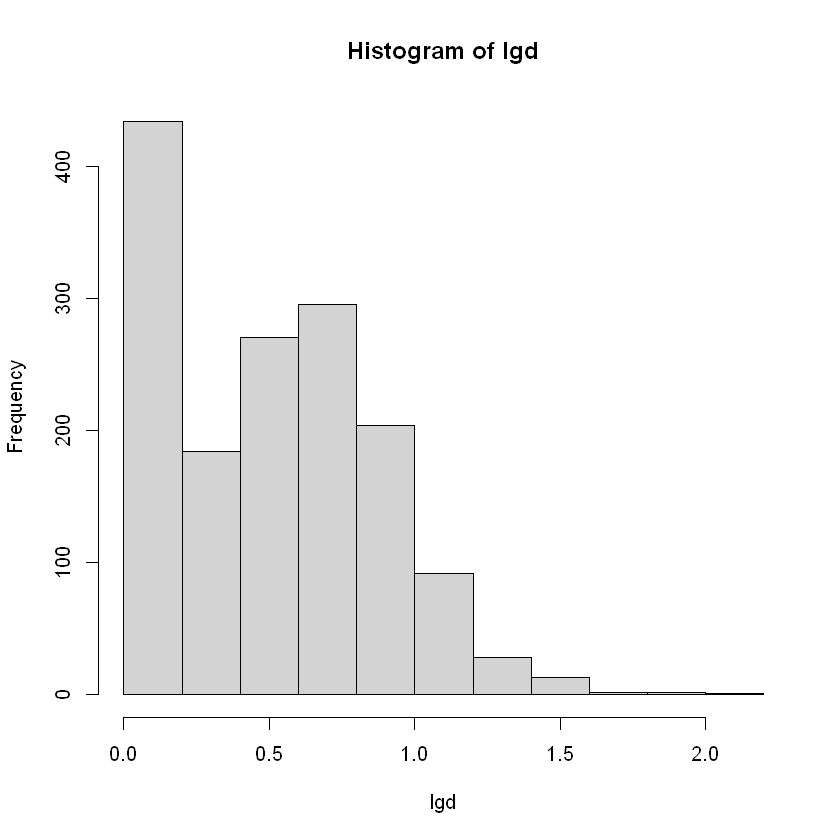

In [33]:
#histogram lgd
lgd <- data$lgd_time
hist(lgd)

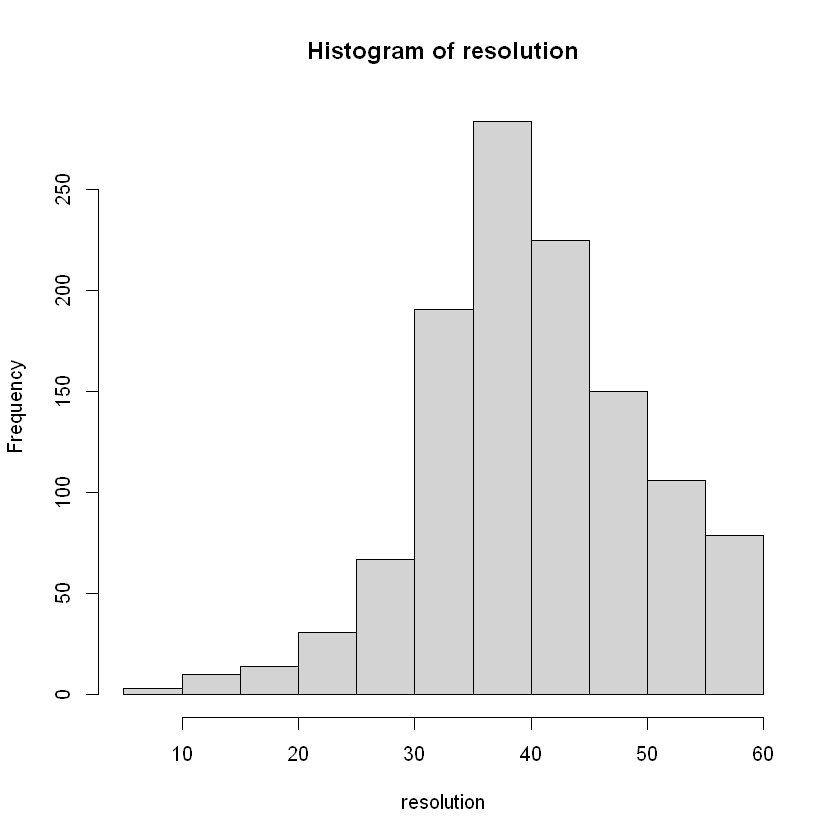

In [34]:
#histogram resolution point-in-time
resolution <- data$res_time
hist(resolution)

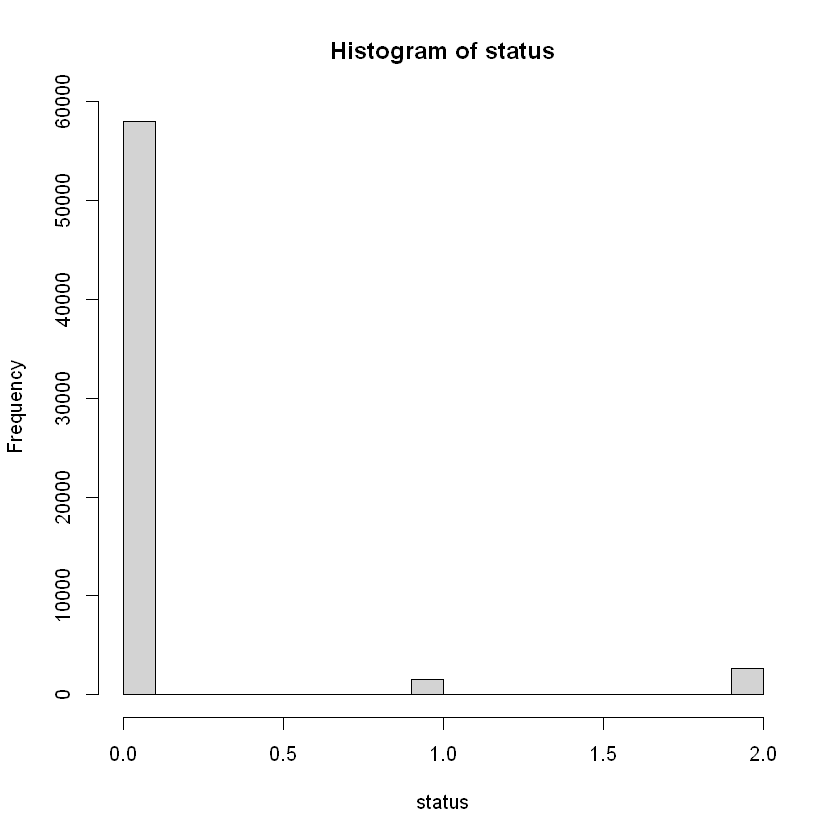

In [35]:
#histogram of loans(0 - not payoff, nor default, 1 - default, 2 - payoff)
status <- data$status_time
hist(status)

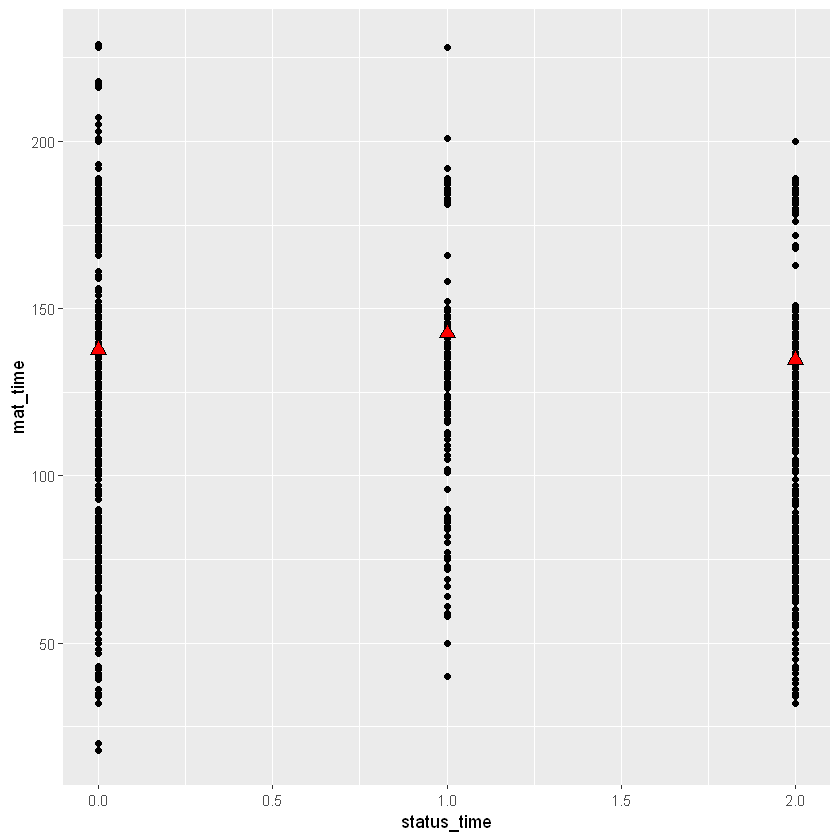

In [37]:
# maturity distribution for given loan status 
# mat_time - when the loan will mature
ggplot(data=data, aes(x=status_time, y=mat_time, group=1)) +
  geom_point()+
    stat_summary(
        geom = "point",
        fun = "mean",
        col = "black",
        size = 3,
        shape = 24,
        fill = "red"
      )

In [153]:
# loan period
data$mat_diff <- data$mat_time-data$orig_time

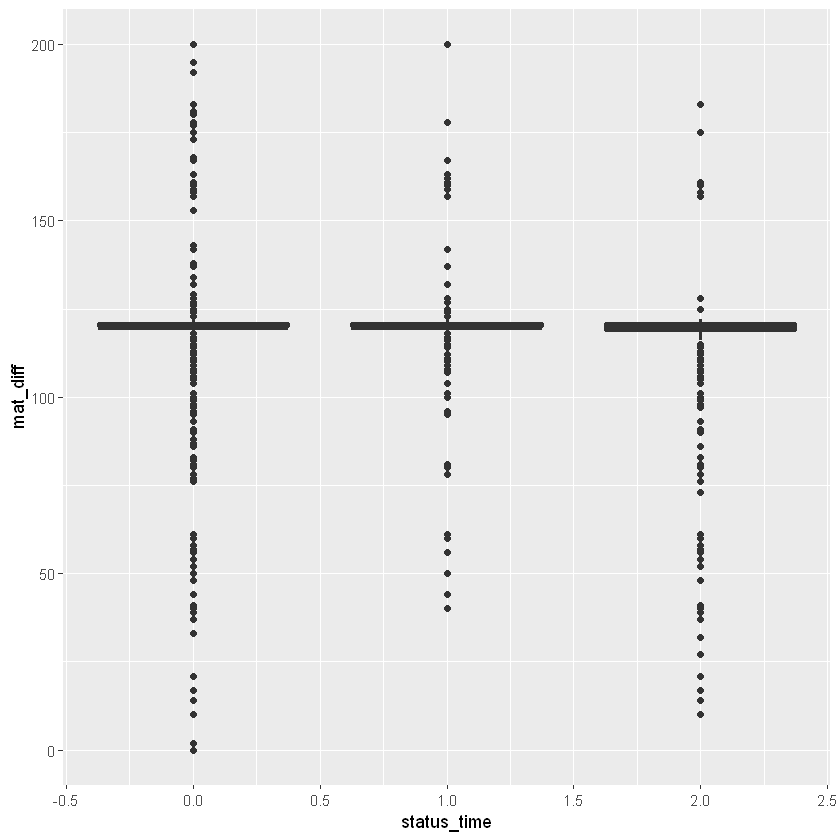

In [39]:
# loan period distribution
ggplot() +
    geom_boxplot(data=data[data['status_time'] == 0,],aes(y=mat_diff,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 1,],aes(y=mat_diff,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 2,],aes(y=mat_diff,x=status_time),size=1)

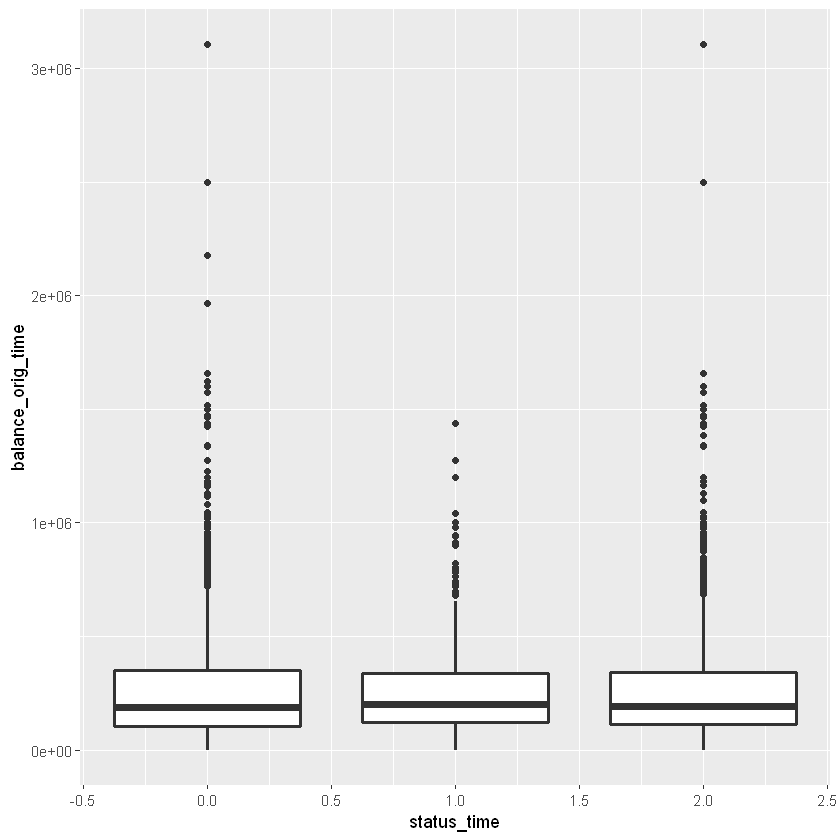

In [40]:
# distribution of outstanding balance at origination distribution by status of loan
ggplot() +
    geom_boxplot(data=data[data['status_time'] == 0,],aes(y=balance_orig_time,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 1,],aes(y=balance_orig_time,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 2,],aes(y=balance_orig_time,x=status_time),size=1)

In [112]:
data <- data %>% group_by(id) %>% mutate(last_time = +(row_number() == n()))

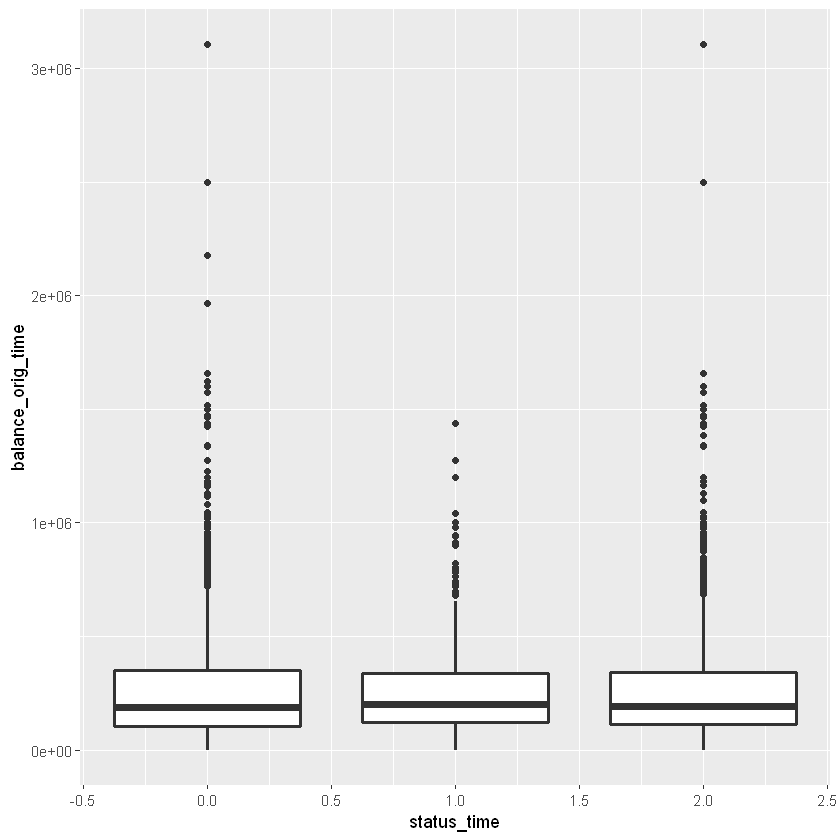

In [122]:
# distribution of outstanding balance at last observation distribution by status of loan
ggplot() +
    geom_boxplot(data=data[data['status_time'] == 0,],aes(y=balance_orig_time,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 1,],aes(y=balance_orig_time,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 2,],aes(y=balance_orig_time,x=status_time),size=1)

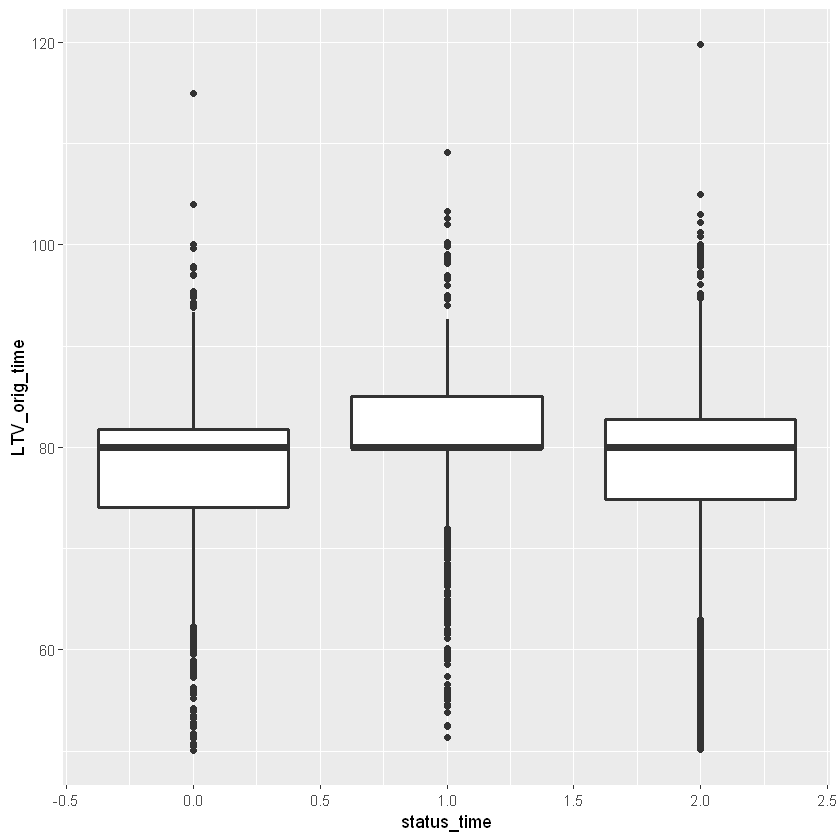

In [121]:
# distribution of LTV at origination by status of loan
ggplot() +
    geom_boxplot(data=data[data['last_time'] == 1 & data['status_time'] == 0,], aes(y=LTV_orig_time,x=status_time),size=1)+
    geom_boxplot(data=data[data['last_time'] == 1 & data['status_time'] == 1,], aes(y=LTV_orig_time,x=status_time),size=1)+
    geom_boxplot(data=data[data['last_time'] == 1 & data['status_time'] == 2,], aes(y=LTV_orig_time,x=status_time),size=1)

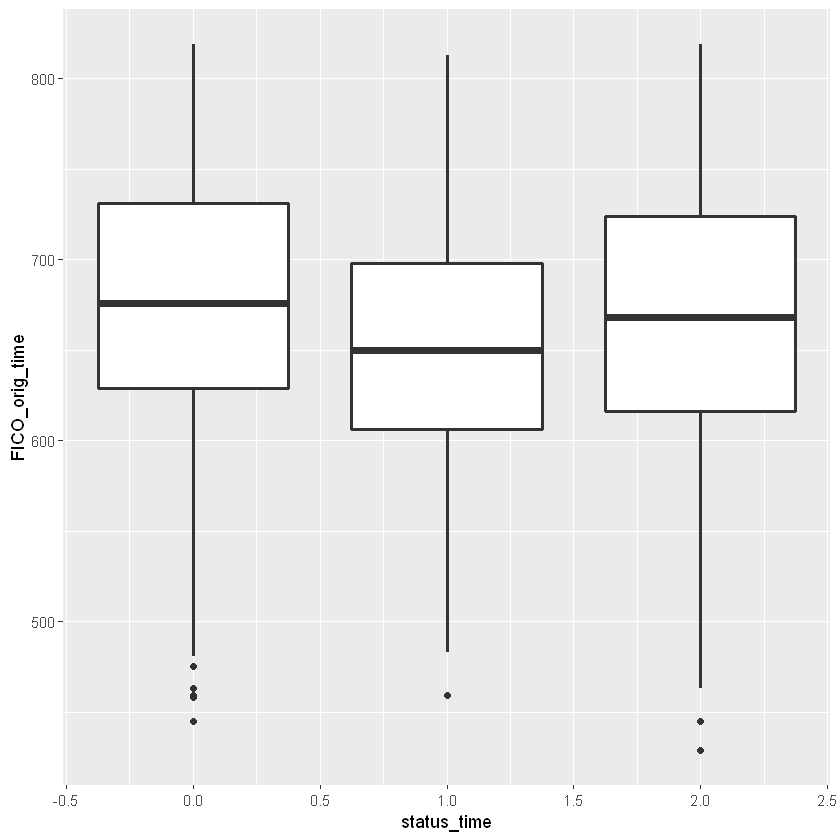

In [42]:
# distribution of FICO at origination by status of loan
ggplot() +
    geom_boxplot(data=data[data['status_time'] == 0,],aes(y=FICO_orig_time,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 1,],aes(y=FICO_orig_time,x=status_time),size=1)+
    geom_boxplot(data=data[data['status_time'] == 2,],aes(y=FICO_orig_time,x=status_time),size=1)

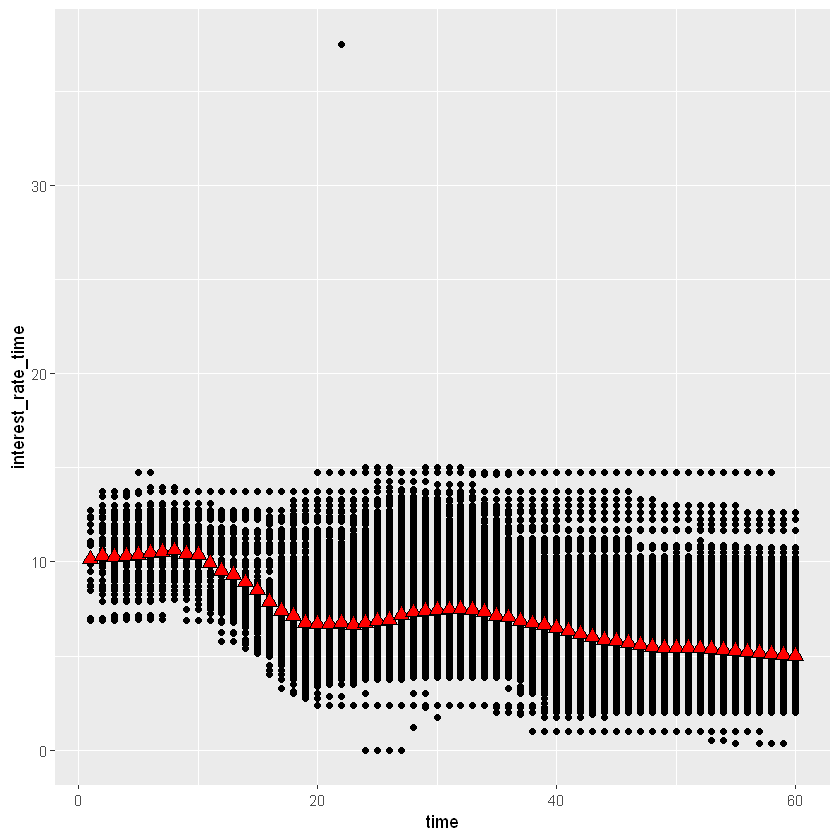

In [43]:
# Interest rate against observation times
ggplot(data=data, aes(x=time, y=interest_rate_time, group=1)) +
  geom_point()+
    stat_summary(
        geom = "point",
        fun = "mean",
        col = "black",
        size = 3,
        shape = 24,
        fill = "red"
      )

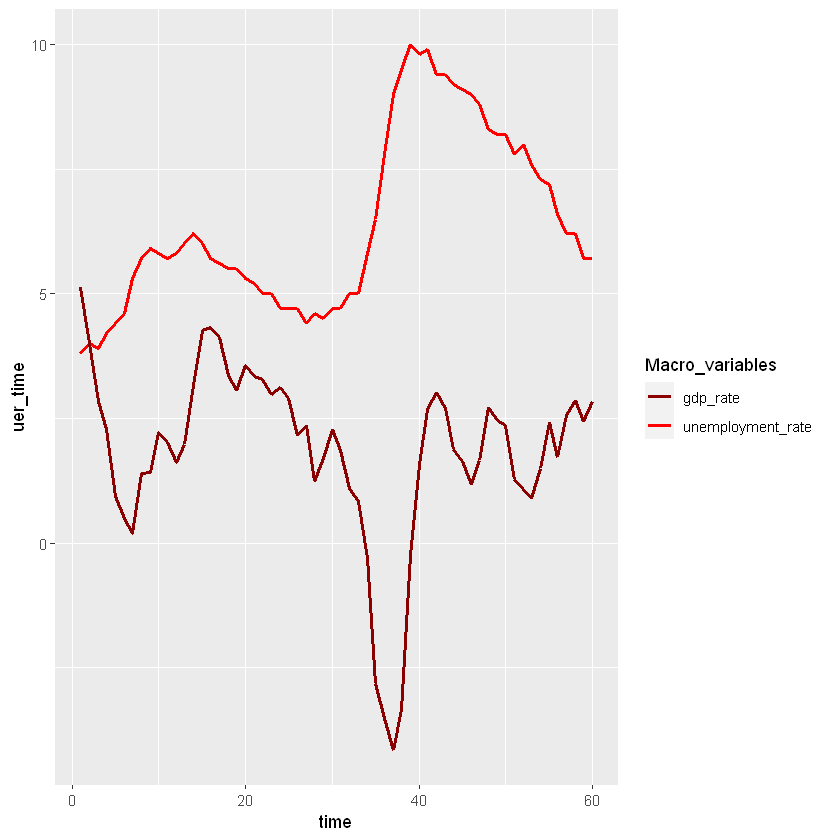

In [45]:
# macro variables against time 
ggplot()+
    geom_line(data=data,aes(y=uer_time,x= time,colour="unemployment_rate"),size=1 )+
    geom_line(data=data,aes(y=gdp_time,x= time,colour="gdp_rate"),size=1) +
    scale_color_manual(values = c(
    'unemployment_rate' = 'red',
    'gdp_rate' = 'darkred')) +
  labs(color = 'Macro_variables')

In [46]:
# data with only defaulted loans
data_post_d <- data[data$status_time == 1,]

In [47]:
data_post_d <- data_post_d %>%
  group_by(time) %>%
  summarise(count = n())

`summarise()` ungrouping output (override with `.groups` argument)



In [48]:
# data with only payoff loans
data_post_p <- data[data$status_time == 2,]

In [49]:
data_post_p <- data_post_p %>%
  group_by(time) %>%
  summarise(count = n())

`summarise()` ungrouping output (override with `.groups` argument)



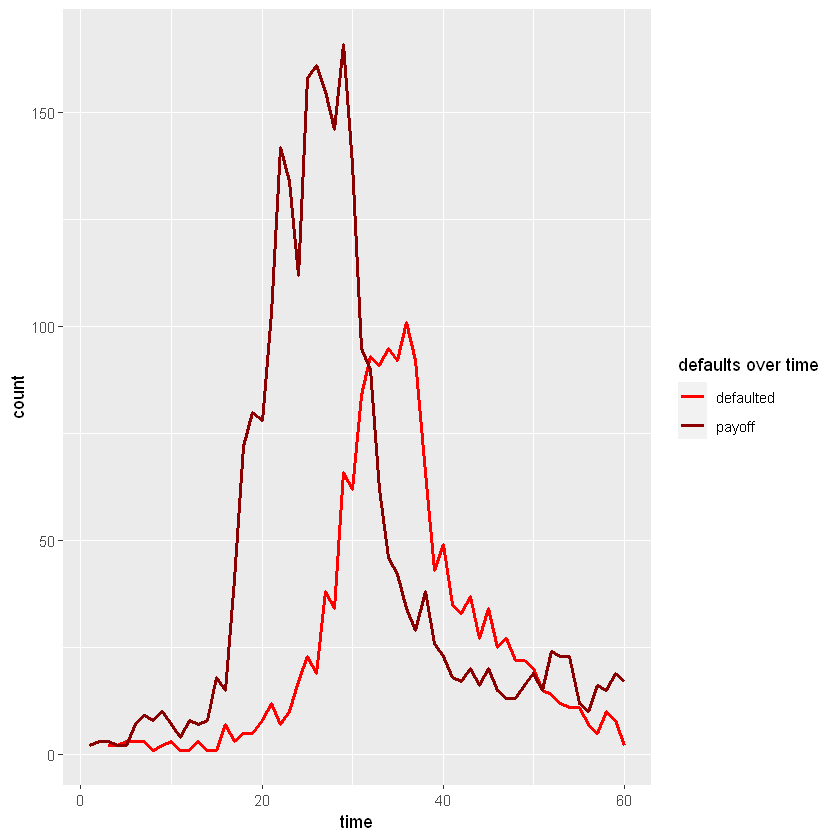

In [50]:
# payoff and defaulted loans over time 
ggplot()+
    geom_line(data=data_post_d,aes(y=count,x=time,colour="defaulted"),size=1)+
    geom_line(data=data_post_p,aes(y=count,x=time,colour="payoff"),size=1) +
    scale_color_manual(values = c(
    'defaulted' = 'red',
    'payoff' = 'darkred')) +
  labs(color = 'defaults over time')

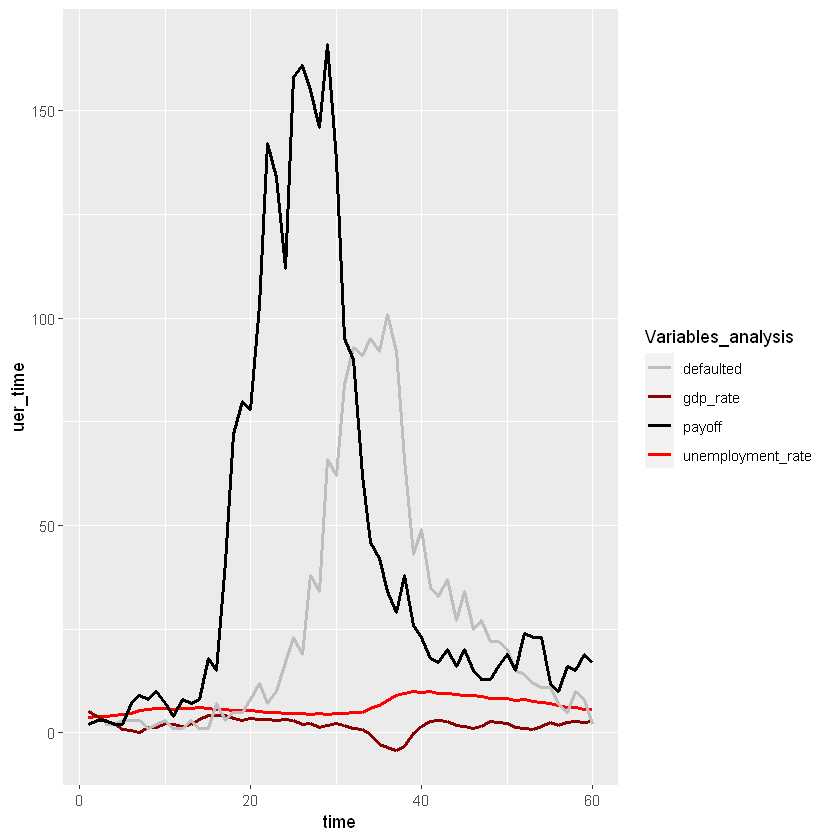

In [51]:
# payoff and defaulted loans over time & macro variables
ggplot()+
    geom_line(data=data,aes(y=uer_time,x= time,colour="unemployment_rate"),size=1 )+
    geom_line(data=data,aes(y=gdp_time,x= time,colour="gdp_rate"),size=1) +
    geom_line(data=data_post_d,aes(y=count,x=time,colour="defaulted"),size=1 )+
    geom_line(data=data_post_p,aes(y=count,x=time,colour="payoff"),size=1) +
    scale_color_manual(values = c(
    'unemployment_rate' = 'red',
    'gdp_rate' = 'darkred',
    'defaulted' = 'grey',
    'payoff' = 'black')) +
  labs(color = 'Variables_analysis')

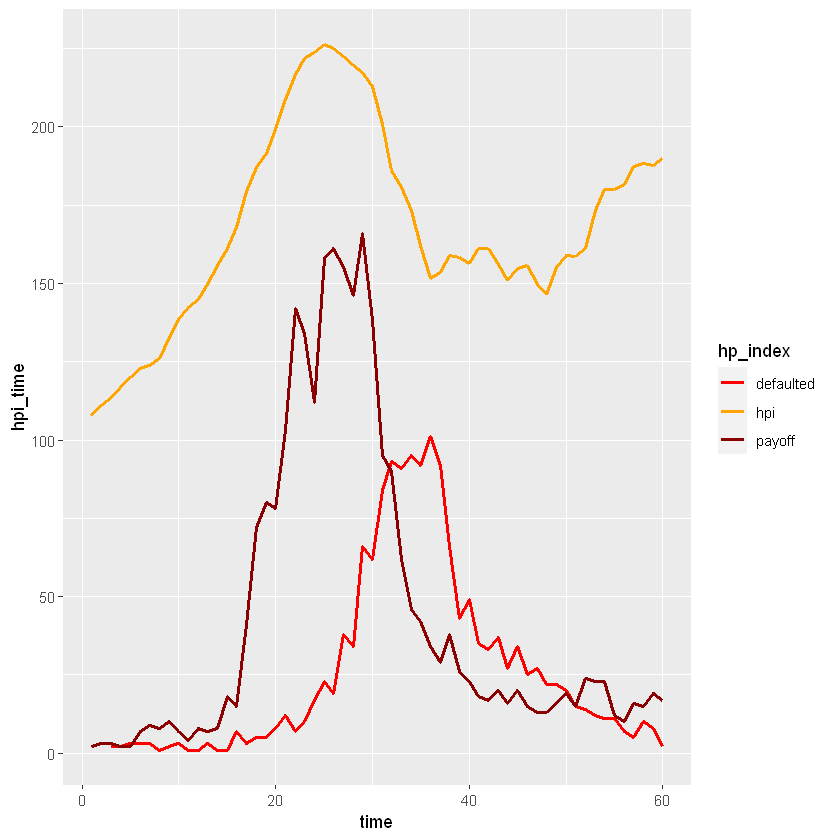

In [52]:
# HPI graph vs defualted and payoff loans
ggplot()+
    geom_line(data=data,aes(y=hpi_time, x= time,colour="hpi"),size=1 )+
    geom_line(data=data_post_d,aes(y=count,x=time,colour="defaulted"),size=1 )+
    geom_line(data=data_post_p,aes(y=count,x=time,colour="payoff"),size=1) +
    scale_color_manual(values = c(
        'hpi' = 'orange',
        'defaulted' = 'red',
        'payoff' = 'darkred')) +
    labs(color = 'hp_index')

In [53]:
#house price index at observation time for defaulted loans
hpi_mean_d = data[data[, "status_time"] == 1,]['hpi_orig_time']

In [54]:
mean(hpi_mean_d$hpi_orig_time)

[1] 209.535

In [55]:
#house price index at observation time for payoff loans
hpi_mean_nd = data[data[, "status_time"] == 2,]['hpi_orig_time']

In [56]:
#house price index at observation time for non-defaulted loans
mean(hpi_mean_nd$hpi_orig_time)

[1] 186.8024

In [57]:
# investor borrower - % of defaulted loans
inv_b = data[data[, "investor_orig_time"] == 1,]

In [58]:
inv_b_unique_id = nrow(unique(inv_b['id']))

In [59]:
nrow(subset(inv_b, (!is.na(inv_b[,'lgd_time']))))/inv_b_unique_id

[1] 0.350081

In [60]:
# only defaulted loans
data_cut_d.m = melt(data[data[, "status_time"] == 1,][,14:17])

No id variables; using all as measure variables



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



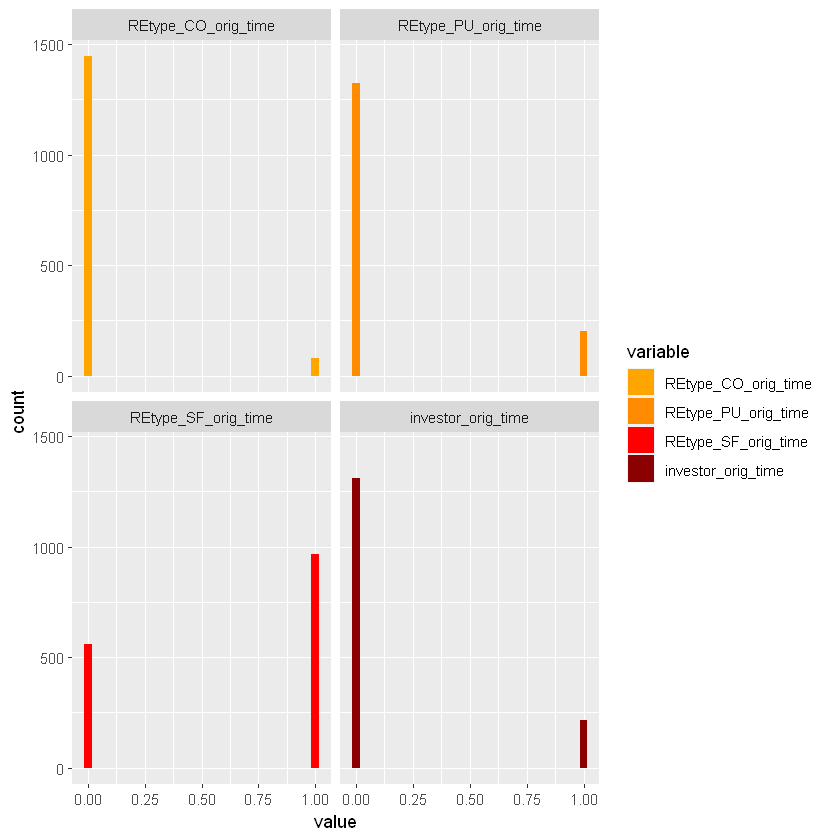

In [61]:
# histogram for real estate type dummy variables and investor dummy variable
# 1st - real estate type condominium (REtype_CO_orig_time)
# 2nd - real estate type planned urban dev (REtype_PU_orig_time)
# 3rd - real estate type single family home (REtype_SF_orig_time)
# 4th - investor borrower (investor_orig_time) 
ggplot(data_cut_d.m, aes(value), color=cyl) + geom_histogram(aes(fill=variable)) +
facet_wrap(~variable)+
scale_fill_manual(values=c("orange", "darkorange", "red", "darkred"))

In [62]:
# only payoff loans
data_cut_p.m = melt(data[data[, "status_time"] == 2,][,14:17])

No id variables; using all as measure variables



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



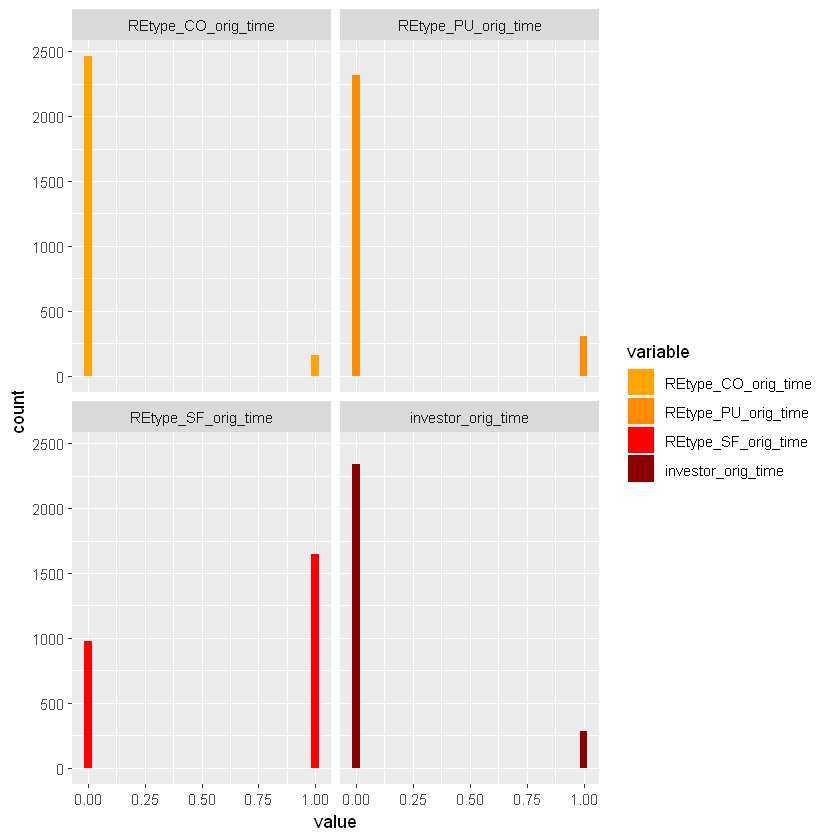

In [63]:
ggplot(data_cut_p.m, aes(value), color=cyl) + geom_histogram(aes(fill=variable)) +
facet_wrap(~variable)+
scale_fill_manual(values=c("orange", "darkorange", "red", "darkred"))

In [64]:
# not defaulted, nor payoff
data_cut_a.m = melt(data[data[, "status_time"] == 0,][,14:17])

No id variables; using all as measure variables



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



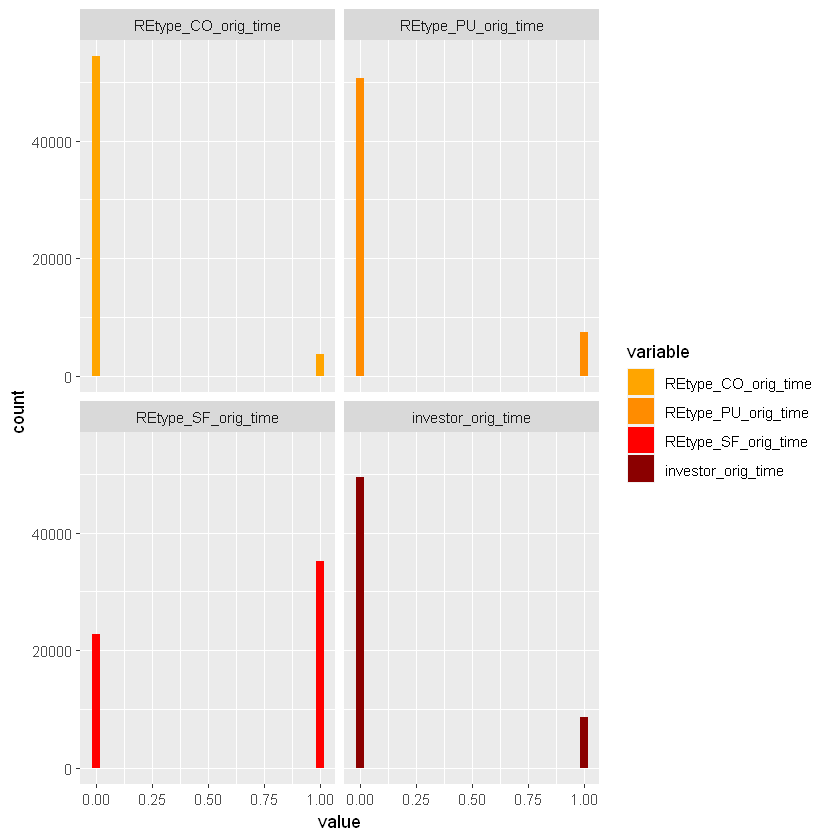

In [65]:
ggplot(data_cut_a.m, aes(value)) + geom_histogram(aes(fill=variable)) +
facet_wrap(~variable)+
scale_fill_manual(values=c("orange", "darkorange", "red", "darkred"))

In [ ]:
#It can be deduced from the histograms' analysis above that 4 categorical variables have marginal impact on default event, this hypothesis will be tested at the modelling stage

### Feature Engineering

In [69]:
str(data)

'data.frame':	62178 obs. of  29 variables:
 $ id                     : int  4 4 4 4 4 4 4 4 4 4 ...
 $ time                   : int  25 26 27 28 29 30 31 32 33 34 ...
 $ orig_time              : int  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 ...
 $ first_time             : int  25 25 25 25 25 25 25 25 25 25 ...
 $ mat_time               : int  119 119 119 119 119 119 119 119 119 119 ...
 $ res_time               : int  NA NA NA NA NA NA NA NA NA NA ...
 $ balance_time           : num  61031 60882 60730 60576 60424 ...
 $ LTV_time               : num  33.9 34 34.3 34.7 35 ...
 $ interest_rate_time     : num  10.5 10.5 10.5 10.9 10.9 ...
 $ rate_time              : num  5.9 5.9 5.9 5.9 5.9 5.9 5.9 5.9 5.9 5.9 ...
 $ hpi_time               : num  226 225 222 220 217 ...
 $ gdp_time               : num  2.9 2.15 2.36 1.23 1.69 ...
 $ uer_time               : num  4.7 4.7 4.4 4.6 4.5 4.7 4.7 5 5 5.8 ...
 $ REtype_CO_orig_time    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_PU_orig_time    : int  0 0 0 0 0 

In [70]:
data_modified <- data %>% dplyr::select(2,3,4,5,7,8,9,10,11,12,13,18,19,20,21,23,29)

In [76]:
head(data_modified)

,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,mat_diff
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,25,-2,25,119,61031.10,33.91101,10.500,5.9,226.29,2.899137,4.7,63750,587,81.8,10.5,97.99,121
2,26,-2,25,119,60882.42,34.00723,10.500,5.9,225.10,2.151365,4.7,63750,587,81.8,10.5,97.99,121
3,27,-2,25,119,60729.80,34.33535,10.500,5.9,222.39,2.361722,4.4,63750,587,81.8,10.5,97.99,121
4,28,-2,25,119,60576.14,34.67254,10.875,5.9,219.67,1.229172,4.6,63750,587,81.8,10.5,97.99,121
5,29,-2,25,119,60424.39,34.95164,10.875,5.9,217.37,1.692969,4.5,63750,587,81.8,10.5,97.99,121
6,30,-2,25,119,60268.48,35.62184,10.875,5.9,212.73,2.274218,4.7,63750,587,81.8,10.5,97.99,121


In [75]:
# deleting row with NA observation
data_modified <- data_modified[!is.na(data_modified['LTV_time']),]

#### Pearson Correlation

In [90]:
matrix_corr <- cor(data_modified,method='pearson')

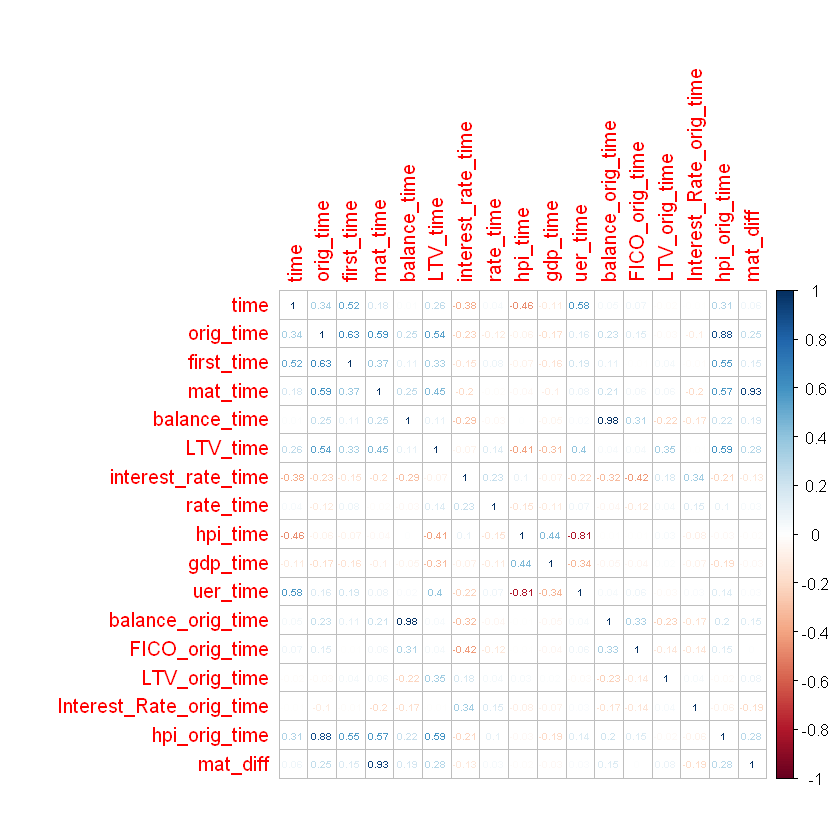

In [93]:
corrplot(matrix_corr, method = 'number', number.cex = 0.5)

In [101]:
corr <- as.data.frame(as.table(matrix_corr))

In [102]:
min_corr <- head(arrange(corr, Freq),10)

In [103]:
max_corr <- arrange(corr, desc(Freq))

In [107]:
max_corr <- max_corr[18:nrow(max_corr),]

In [104]:
min_corr

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
1,uer_time,hpi_time,-0.8076722
2,hpi_time,uer_time,-0.8076722
3,hpi_time,time,-0.4624999
4,time,hpi_time,-0.4624999
5,FICO_orig_time,interest_rate_time,-0.4220100
6,interest_rate_time,FICO_orig_time,-0.4220100
7,hpi_time,LTV_time,-0.4070276
8,LTV_time,hpi_time,-0.4070276
9,interest_rate_time,time,-0.3762370


In [109]:
head(max_corr,10)

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
18,balance_orig_time,balance_time,0.9846458
19,balance_time,balance_orig_time,0.9846458
20,mat_diff,mat_time,0.9267510
21,mat_time,mat_diff,0.9267510
22,hpi_orig_time,orig_time,0.8848987
23,orig_time,hpi_orig_time,0.8848987
24,first_time,orig_time,0.6315999
25,orig_time,first_time,0.6315999
26,hpi_orig_time,LTV_time,0.5921015


#### PCA

In [77]:
res.pca <- prcomp(data_modified, scale = TRUE, center = TRUE)

In [78]:
summary(res.pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.0891 1.6022 1.4417 1.18804 1.14787 1.00762 0.95451
Proportion of Variance 0.2567 0.1510 0.1223 0.08303 0.07751 0.05972 0.05359
Cumulative Proportion  0.2567 0.4077 0.5300 0.61302 0.69053 0.75025 0.80384
                           PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     0.90561 0.88207 0.77094 0.64130 0.52000 0.4647 0.40631
Proportion of Variance 0.04824 0.04577 0.03496 0.02419 0.01591 0.0127 0.00971
Cumulative Proportion  0.85209 0.89785 0.93282 0.95701 0.97291 0.9856 0.99533
                          PC15    PC16     PC17
Standard deviation     0.26565 0.09397 2.69e-14
Proportion of Variance 0.00415 0.00052 0.00e+00
Cumulative Proportion  0.99948 1.00000 1.00e+00

Registered S3 methods overwritten by 'broom':
  method            from  
  tidy.glht         jtools
  tidy.summary.glht jtools



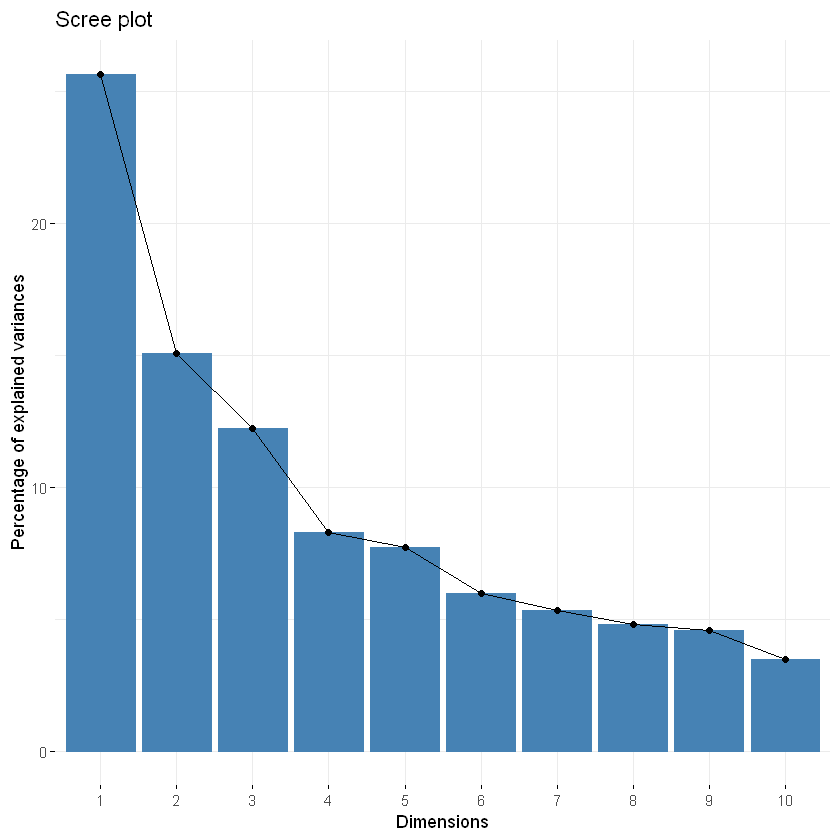

In [81]:
# The percentage of variances explained by each principal component.
fviz_eig(res.pca)

In [82]:
# Results for Variables
res.var <- get_pca_var(res.pca)

In [83]:
# Contributions of given variables to the PCs
res.var$contrib 

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14,Dim.15,Dim.16,Dim.17
time,7.080922340,4.66969115,4.97209108,10.829614411,0.09686097,7.01378000,8.04812881,1.20782649,2.265349e-01,4.78575129,0.392244392,34.591573719,15.206756854,3.947439e-01,4.553074e-01,2.817228e-02,9.920108e-28
orig_time,15.052702844,0.08929724,3.30939608,2.237576331,8.84477876,0.73624468,3.34168688,0.21732202,2.603015e-01,3.93217241,0.313059180,1.346643813,5.740833076,9.170776e+00,3.724998e+01,2.887818e-03,8.154340e+00
first_time,9.221198771,0.84379579,1.59037501,4.346621793,12.38223623,3.37628278,2.36795654,0.63209596,2.956427e+00,19.99984473,4.441087366,35.242159548,0.015774487,1.827819e-02,2.562872e+00,2.993645e-03,1.850819e-29
mat_time,12.263484232,1.02329458,10.81992862,0.712567052,9.56948758,3.81760017,1.35394681,0.10425275,2.515980e+00,0.30604126,0.181715990,0.074837353,0.467303006,4.389632e-01,2.050556e+00,4.297473e-03,5.429574e+01
balance_time,4.491139309,15.69895058,4.67587672,14.340008923,0.91342823,0.14422471,3.43258213,5.41707856,7.921426e-01,0.02044194,0.003610951,0.001208795,0.471235749,2.925807e-01,6.044539e-02,4.924504e+01,8.928510e-30
LTV_time,10.439154518,5.34453978,1.66158771,1.834908400,0.20469557,15.07305869,0.57861249,0.04462471,4.380988e-03,12.57058881,0.515954800,6.751469916,37.208650324,5.573046e+00,8.380553e-01,1.356672e+00,2.123338e-30
interest_rate_time,4.348542467,4.83984985,7.39379291,14.995159886,3.02939801,0.04082407,1.55443019,2.34889518,1.226633e+00,0.05368481,53.579256069,5.331809129,0.613240408,5.090976e-01,1.252360e-01,1.015020e-02,1.232595e-30
rate_time,0.014740188,3.88999679,0.23565097,17.176251343,2.08950136,7.82447270,20.25450586,42.79077537,3.355683e-02,0.01569332,1.090590475,0.011706184,0.995557921,1.837714e-01,3.392643e+00,5.867125e-04,5.730845e-30
hpi_time,3.095008133,13.94875197,13.99755152,2.079306390,5.18013361,0.07190067,0.27846862,0.40060153,7.708718e-04,2.82019014,1.426021764,1.353116781,0.002614382,4.923049e+01,5.896506e+00,2.185729e-01,2.359264e-29
gdp_time,2.381345684,5.55500708,2.10489228,10.314608096,0.13656190,3.84734776,27.43027191,1.44096066,5.867803e+00,29.47692539,8.088877555,2.034552858,0.075488079,9.323826e-01,3.124502e-01,5.248486e-04,1.203706e-31


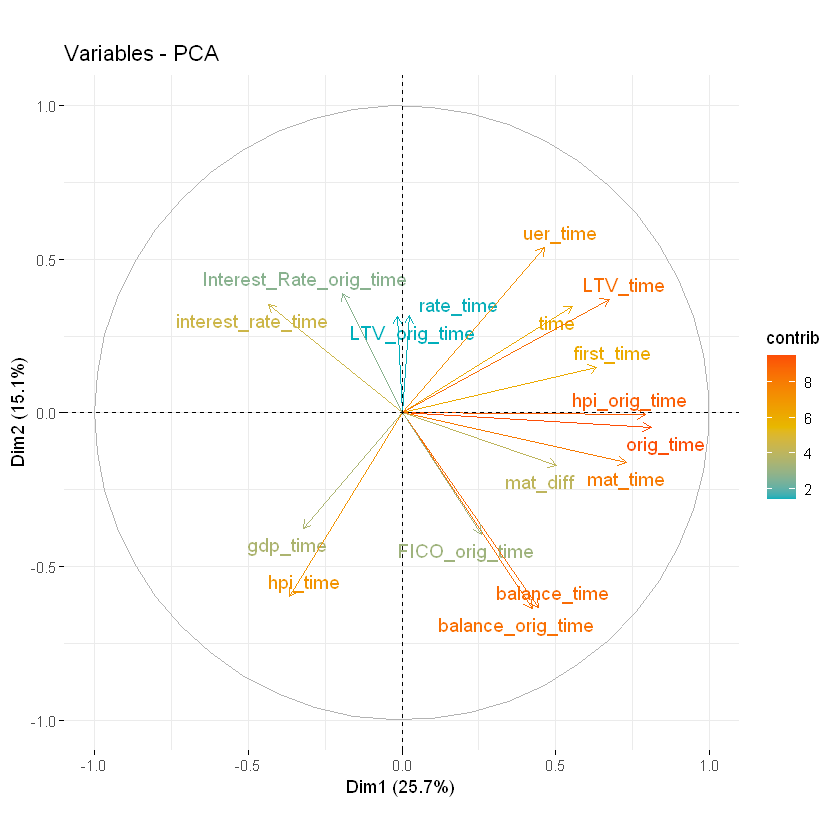

In [84]:
# Graph of variables. Positive correlated variables point to the same side of the plot
# Negative correlated variables point to opposite sides of the graph.
fviz_pca_var(res.pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

In [85]:
res.ind <- get_pca_ind(res.pca)

In [123]:
# getting the 10 components that in overall explain 93% of varaiance
variables_pca <- res.ind$coord[,1:10]

In [ ]:
# Based on PCA I decided to leave all variable intact 
# This approach ensures more interpretability and as it can be seen most of the variables are not strongly related
# Even though some variables are strongly correlated eg. balance time and balance_orig_time, EDA shows that there is a reason to believe that there is a difference between loans with different status(payoff vs defaulted vs current)
# Nevertheless the analysis can be conducted e.g. for dataset which includes variables_pca

### Probability of Cure

In [154]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [155]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [156]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [157]:
# selecting predictors and dependent variable(res_sold)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,28:30)

In [158]:
# deleting resolution timestamp and resolution amount
data_modelling <- data_modelling[,-c(5,15)]

In [159]:
# changing variables types
data_modelling[colnames(data_modelling[,c(7:9)])] <- lapply(data_modelling[colnames(data_modelling[,c(7:9)])], factor)

In [168]:
data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [169]:
data_modelling[is.na(data_modelling['LTV_time']),]

time,orig_time,first_time,mat_time,balance_time,LTV_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,state_orig_time,mat_diff,res_sold
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<int>,<dbl>


In [170]:
# dropping missing observations(1)
data_modelling <- data_modelling %>% drop_na()

In [178]:
str(data_modelling)

'data.frame':	1524 obs. of  15 variables:
 $ time               : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time          : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time         : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time           : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time       : num  130140 127859 84387 227000 223885 ...
 $ LTV_time           : num  99.1 101.4 102.6 67.5 87.2 ...
 $ REtype_CO_orig_time: Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...
 $ REtype_PU_orig_time: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ REtype_SF_orig_time: Factor w/ 2 levels "0","1": 2 2 2 2 2 1 2 2 2 2 ...
 $ balance_orig_time  : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time     : int  501 536 556 622 630 613 605 596 633 587 ...
 $ LTV_orig_time      : num  80 69.6 80 64.9 80 80 80 71.1 90 80 ...
 $ state_orig_time    : Factor w/ 51 levels "","AK","AL","AR",..: 12 11 36 35 11 11 11 6 22 6 ...
 $ mat_diff           : int  120 1

In [179]:
set.seed(101) 

In [180]:
train_index <- caret::createDataPartition(data_modelling$res_sold, p = .7, list = FALSE)

In [181]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [182]:
logit_full<- glm(res_sold~., family = binomial(link = 'logit'), data = train)

In [183]:
logit_stepwise<- stepAIC(logit_full, k= qchisq(0.05, 1, lower.tail=F), direction = 'both')

Start:  AIC=1085.08
res_sold ~ time + orig_time + first_time + mat_time + balance_time + 
    LTV_time + REtype_CO_orig_time + REtype_PU_orig_time + REtype_SF_orig_time + 
    balance_orig_time + FICO_orig_time + LTV_orig_time + state_orig_time + 
    mat_diff


Step:  AIC=1085.08
res_sold ~ time + orig_time + first_time + mat_time + balance_time + 
    LTV_time + REtype_CO_orig_time + REtype_PU_orig_time + REtype_SF_orig_time + 
    balance_orig_time + FICO_orig_time + LTV_orig_time + state_orig_time

                      Df Deviance    AIC
- state_orig_time     49   962.51 1012.5
- mat_time             1   846.97 1081.3
- LTV_time             1   847.51 1081.8
- balance_time         1   847.56 1081.9
- REtype_PU_orig_time  1   847.89 1082.2
- balance_orig_time    1   847.92 1082.2
- orig_time            1   848.18 1082.5
- first_time           1   848.52 1082.8
- LTV_orig_time        1   848.73 1083.1
- REtype_SF_orig_time  1   849.66 1084.0
- REtype_CO_orig_time  1   849.96 1084.3


In [184]:
summary(logit_stepwise)


Call:
glm(formula = res_sold ~ time + REtype_CO_orig_time + balance_orig_time + 
    FICO_orig_time, family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7412   0.1235   0.4914   0.6842   2.1279  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.276e+00  8.199e-01   1.556 0.119608    
time                 -1.319e-01  1.085e-02 -12.153  < 2e-16 ***
REtype_CO_orig_time1  1.016e+00  4.715e-01   2.154 0.031247 *  
balance_orig_time    -1.557e-06  4.639e-07  -3.356 0.000791 ***
FICO_orig_time        7.991e-03  1.343e-03   5.950 2.68e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1182.69  on 1066  degrees of freedom
Residual deviance:  971.61  on 1062  degrees of freedom
AIC: 981.61

Number of Fisher Scoring iterations: 5


In [185]:
test$predict_logit <- predict(logit_stepwise, newdata = test, type = 'response')

In [186]:
gini_test<- optiRum::giniCoef(test$predict_logit, test$res_sold)

In [187]:
# The 0.51 Gini index for test sample highlights an average model discriminatory power.
gini_test

[1] 0.5123918

In [ ]:
# Despite its statistical non-significance of the variable ltv_utd, its economic relevance suggests the inclusion in the model. 
# Furthermore, based on stepwise analysis we found that the region variables are not statistically significant
# However those are usually included in model, so one would potentially need to group the variable region in order to obtain significant bins.

### Loss Severity

In [188]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [189]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [190]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [191]:
# filtering loans that was not cured
data_modelling <- data_modelling[data_modelling['res_sold']==1,]

In [192]:
# selecting predictors and dependent variable(lgd)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,27:30)

In [193]:
# new feature - time elapsed between bankruptcy and resolution
data_modelling$res_diff <- data_modelling$res_time - data_modelling$time

In [194]:
# deleting resolution amount
data_modelling <- data_modelling[,-c(16)]

In [195]:
# deleting region variable as categorical predictors must have at most 32 levels
# the solution, which was also suggested in previous point is to group region variables in new bins
data_modelling <- data_modelling[,-c(14)]

In [196]:
str(data_modelling)

'data.frame':	1160 obs. of  17 variables:
 $ time               : int  31 33 31 42 39 37 33 27 31 30 ...
 $ orig_time          : int  23 27 26 27 28 28 28 17 26 19 ...
 $ first_time         : int  26 28 28 32 32 32 32 20 28 19 ...
 $ mat_time           : int  143 147 147 148 88 148 148 138 146 133 ...
 $ res_time           : int  38 43 60 44 41 60 36 27 37 48 ...
 $ balance_time       : num  223885 144375 285485 79140 150074 ...
 $ LTV_time           : num  87.2 98.3 89.5 121.5 122.6 ...
 $ REtype_CO_orig_time: int  0 1 0 0 0 0 0 0 0 0 ...
 $ REtype_PU_orig_time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time: int  1 0 1 1 0 1 1 1 0 1 ...
 $ balance_orig_time  : num  227200 144790 286400 81000 161500 ...
 $ FICO_orig_time     : int  630 613 605 633 584 646 670 509 553 540 ...
 $ LTV_orig_time      : num  80 80 80 90 95 87.1 80 70 85 80 ...
 $ lgd_time           : num  0.884 1.236 0.707 1.077 0.352 ...
 $ mat_diff           : int  120 120 121 121 60 120 120 121 120 114 ...
 $ res_s

In [197]:
# changing variables types
data_modelling[colnames(data_modelling[,c(8:10)])] <- lapply(data_modelling[colnames(data_modelling[,c(8:10)])], factor)

In [198]:
# dropping missing observations(1)
data_modelling <- data_modelling %>% drop_na()

In [199]:
str(data_modelling)

'data.frame':	1160 obs. of  17 variables:
 $ time               : int  31 33 31 42 39 37 33 27 31 30 ...
 $ orig_time          : int  23 27 26 27 28 28 28 17 26 19 ...
 $ first_time         : int  26 28 28 32 32 32 32 20 28 19 ...
 $ mat_time           : int  143 147 147 148 88 148 148 138 146 133 ...
 $ res_time           : int  38 43 60 44 41 60 36 27 37 48 ...
 $ balance_time       : num  223885 144375 285485 79140 150074 ...
 $ LTV_time           : num  87.2 98.3 89.5 121.5 122.6 ...
 $ REtype_CO_orig_time: Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 1 1 ...
 $ REtype_PU_orig_time: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ REtype_SF_orig_time: Factor w/ 2 levels "0","1": 2 1 2 2 1 2 2 2 1 2 ...
 $ balance_orig_time  : num  227200 144790 286400 81000 161500 ...
 $ FICO_orig_time     : int  630 613 605 633 584 646 670 509 553 540 ...
 $ LTV_orig_time      : num  80 80 80 90 95 87.1 80 70 85 80 ...
 $ lgd_time           : num  0.884 1.236 0.707 1.077 0.352 ...
 $ mat_diff

In [200]:
set.seed(101) 

In [921]:
# sample = sample.split(data_modelling$lgd_time, SplitRatio = 0.75)

In [922]:
# train = subset(data_modelling, sample == TRUE)
# test  = subset(data_modelling, sample == FALSE)

In [201]:
train_index <- caret::createDataPartition(data_modelling$lgd_time, p = .7, list = FALSE)

In [202]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [203]:
lgd_reg_tree_sev <- tree(lgd_time~., data=train)

In [204]:
summary(lgd_reg_tree_sev)


Regression tree:
tree(formula = lgd_time ~ ., data = train)
Variables actually used in tree construction:
[1] "res_time"          "balance_time"      "orig_time"        
[4] "res_diff"          "time"              "mat_time"         
[7] "balance_orig_time"
Number of terminal nodes:  12 
Residual mean deviance:  0.07541 = 60.33 / 800 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.09200 -0.18470  0.01075  0.00000  0.17450  1.08300 

In [205]:
# prediction on test sample
lgd_reg_tree_predict_sev <- predict(lgd_reg_tree_sev, newdata = test)

In [206]:
# MSE calculation
mse_lgd_reg_sev <- mean((lgd_reg_tree_predict_sev - test$lgd_time)^2)

In [207]:
mse_lgd_reg_sev

[1] 0.09509618

In [208]:
# tree pruning - select a best sub-tree, assuming that only 3 terminal nodes appear in the plot.
lgd_reg_tree_prune_sev <- prune.tree(lgd_reg_tree_sev, best=3)

In [224]:
summary(lgd_reg_tree_prune_sev)


Regression tree:
snip.tree(tree = lgd_reg_tree_sev, nodes = c(6L, 7L, 2L))
Variables actually used in tree construction:
[1] "res_time" "res_diff"
Number of terminal nodes:  3 
Residual mean deviance:  0.09583 = 77.53 / 809 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.819000 -0.218600  0.003788  0.000000  0.195900  1.167000 

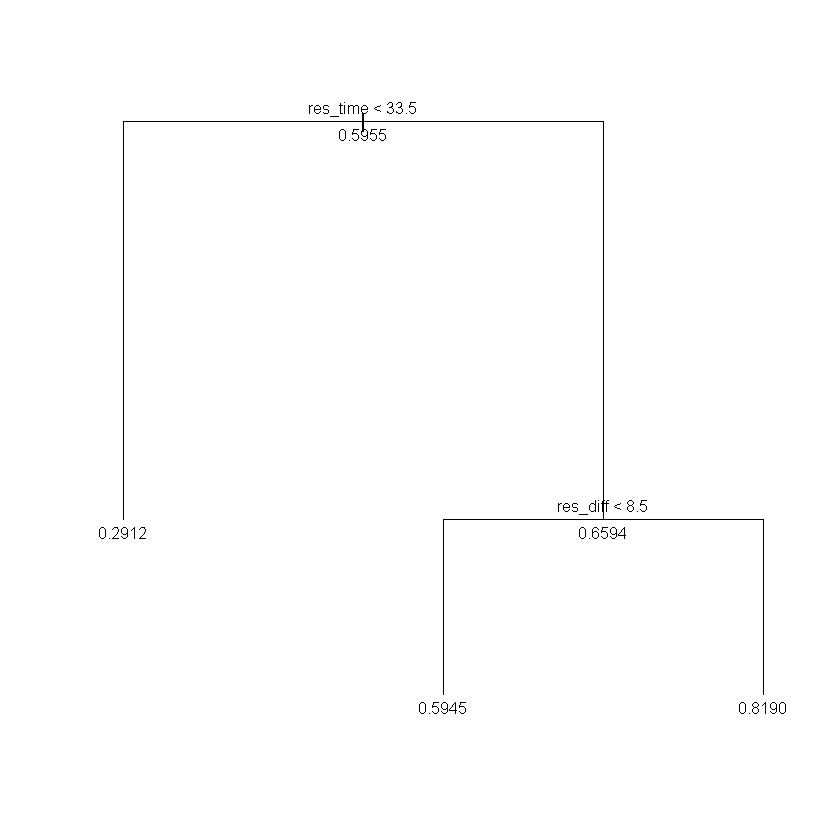

In [272]:
plot(lgd_reg_tree_prune_sev, 
   main="Classification Tree")
   text(lgd_reg_tree_prune_sev, all=TRUE, cex=.8)

In [972]:
#predicting pruned tree
lgd_reg_tree_predict_prune_sev <- predict(lgd_reg_tree_prune_sev, test)

In [977]:
# MSE calculation
mse_lgd_reg_sev <- mean((lgd_reg_tree_predict_prune_sev - test$lgd_time)^2)

In [975]:
mse_lgd_reg_sev

[1] 0.09862669

In [976]:
# In non-pruned tree appx.Residual mean deviance was 0.077, while in pruned tree 0.095
# The mean squared error of the predicted model on the test sample is less than 10% for both non-pruned and pruned trees.

In [236]:
# The tree was constructed based on 7 features, among them previously created res_diff
# The pruned tree also used res_diff feature
# It seems that time from default to resolution is very important feature, which enables to predict loss severity
# Because of that time from default to resolution will be further studied in the next section
# At the same time LTV, which is considered one of the most important feature was not considered in the model

### Conditional Evaluation of Loss Severity given time since default

In [226]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [227]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [228]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [229]:
# filtering loans that was not cured
data_modelling <- data_modelling[data_modelling['res_sold']==1,]

In [230]:
# selecting predictors and dependent variable(lgd)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,27:30)

In [231]:
# time elapsed between bankruptcy and resolution
data_modelling$res_diff <- data_modelling$res_time - data_modelling$time

In [232]:
data_modelling$res_diff <- cut(data_modelling$res_diff, breaks=c(-1,12,38))

In [233]:
# deleting resolution amount
data_modelling <- data_modelling[,-c(16)]

In [234]:
# deleting region variable as categorical predictors must have at most 32 levels
data_modelling <- data_modelling[,-c(14)]

In [237]:
str(data_modelling)

'data.frame':	1160 obs. of  17 variables:
 $ time               : int  31 33 31 42 39 37 33 27 31 30 ...
 $ orig_time          : int  23 27 26 27 28 28 28 17 26 19 ...
 $ first_time         : int  26 28 28 32 32 32 32 20 28 19 ...
 $ mat_time           : int  143 147 147 148 88 148 148 138 146 133 ...
 $ res_time           : int  38 43 60 44 41 60 36 27 37 48 ...
 $ balance_time       : num  223885 144375 285485 79140 150074 ...
 $ LTV_time           : num  87.2 98.3 89.5 121.5 122.6 ...
 $ REtype_CO_orig_time: int  0 1 0 0 0 0 0 0 0 0 ...
 $ REtype_PU_orig_time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time: int  1 0 1 1 0 1 1 1 0 1 ...
 $ balance_orig_time  : num  227200 144790 286400 81000 161500 ...
 $ FICO_orig_time     : int  630 613 605 633 584 646 670 509 553 540 ...
 $ LTV_orig_time      : num  80 80 80 90 95 87.1 80 70 85 80 ...
 $ lgd_time           : num  0.884 1.236 0.707 1.077 0.352 ...
 $ mat_diff           : int  120 120 121 121 60 120 120 121 120 114 ...
 $ res_s

In [238]:
# changing variables types
data_modelling[colnames(data_modelling[,c(8:10)])] <- lapply(data_modelling[colnames(data_modelling[,c(8:10)])], factor)

In [1080]:
# data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time);

In [239]:
# dropping missing observations(1)
data_modelling <- data_modelling %>% drop_na()

In [240]:
str(data_modelling)

'data.frame':	1160 obs. of  17 variables:
 $ time               : int  31 33 31 42 39 37 33 27 31 30 ...
 $ orig_time          : int  23 27 26 27 28 28 28 17 26 19 ...
 $ first_time         : int  26 28 28 32 32 32 32 20 28 19 ...
 $ mat_time           : int  143 147 147 148 88 148 148 138 146 133 ...
 $ res_time           : int  38 43 60 44 41 60 36 27 37 48 ...
 $ balance_time       : num  223885 144375 285485 79140 150074 ...
 $ LTV_time           : num  87.2 98.3 89.5 121.5 122.6 ...
 $ REtype_CO_orig_time: Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 1 1 ...
 $ REtype_PU_orig_time: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ REtype_SF_orig_time: Factor w/ 2 levels "0","1": 2 1 2 2 1 2 2 2 1 2 ...
 $ balance_orig_time  : num  227200 144790 286400 81000 161500 ...
 $ FICO_orig_time     : int  630 613 605 633 584 646 670 509 553 540 ...
 $ LTV_orig_time      : num  80 80 80 90 95 87.1 80 70 85 80 ...
 $ lgd_time           : num  0.884 1.236 0.707 1.077 0.352 ...
 $ mat_diff

In [241]:
set.seed(101) 

In [921]:
# sample = sample.split(data_modelling$lgd_time, SplitRatio = 0.75)

In [922]:
# train = subset(data_modelling, sample == TRUE)
# test  = subset(data_modelling, sample == FALSE)

In [244]:
train_index <- caret::createDataPartition(data_modelling$res_diff, p = .7, list = FALSE)

In [245]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [246]:
lgd_da_1 <- ctree(lgd_time~res_diff-res_sold,data=train,maxdepth = 1)

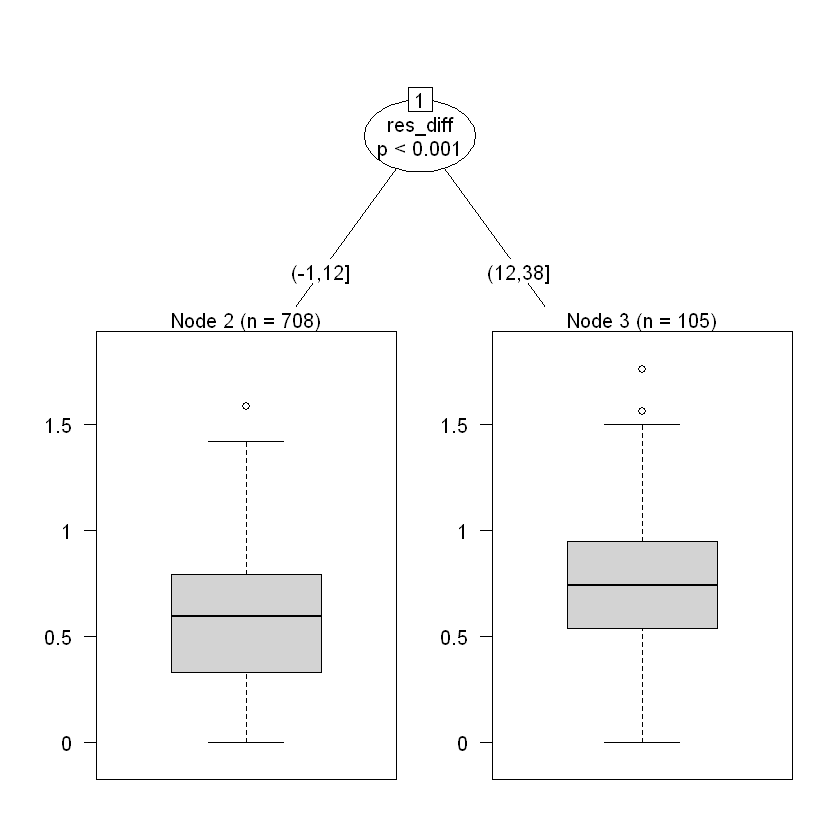

In [247]:
plot(lgd_da_1)

In [305]:
# study of the node 2 in which the resolution sice default occurred within (0,12) months from default
lgd_da_2 <- ctree(lgd_time ~. - res_diff - res_sold, data=train, subset = predict(lgd_da_1, type = 'node') == 2)

In [306]:
lgd_da_2


Model formula:
lgd_time ~ time + orig_time + first_time + mat_time + res_time + 
    balance_time + LTV_time + REtype_CO_orig_time + REtype_PU_orig_time + 
    REtype_SF_orig_time + balance_orig_time + FICO_orig_time + 
    LTV_orig_time + mat_diff

Fitted party:
[1] root
|   [2] LTV_time <= 81.58389
|   |   [3] balance_time <= 91587.79: 0.503 (n = 56, err = 11.3)
|   |   [4] balance_time > 91587.79: 0.272 (n = 98, err = 9.5)
|   [5] LTV_time > 81.58389
|   |   [6] balance_orig_time <= 81000: 0.855 (n = 40, err = 3.7)
|   |   [7] balance_orig_time > 81000
|   |   |   [8] orig_time <= 21: 0.463 (n = 66, err = 5.6)
|   |   |   [9] orig_time > 21
|   |   |   |   [10] time <= 45
|   |   |   |   |   [11] res_time <= 35
|   |   |   |   |   |   [12] res_time <= 33: 0.352 (n = 18, err = 1.1)
|   |   |   |   |   |   [13] res_time > 33
|   |   |   |   |   |   |   [14] time <= 30: 0.631 (n = 16, err = 0.6)
|   |   |   |   |   |   |   [15] time > 30: 0.468 (n = 34, err = 1.3)
|   |   |   |   |   

In [309]:
lgd_da_3 <- ctree(lgd_time ~. - res_diff -res_sold, data=train, subset = predict(lgd_da_1, type = 'node') == 3)

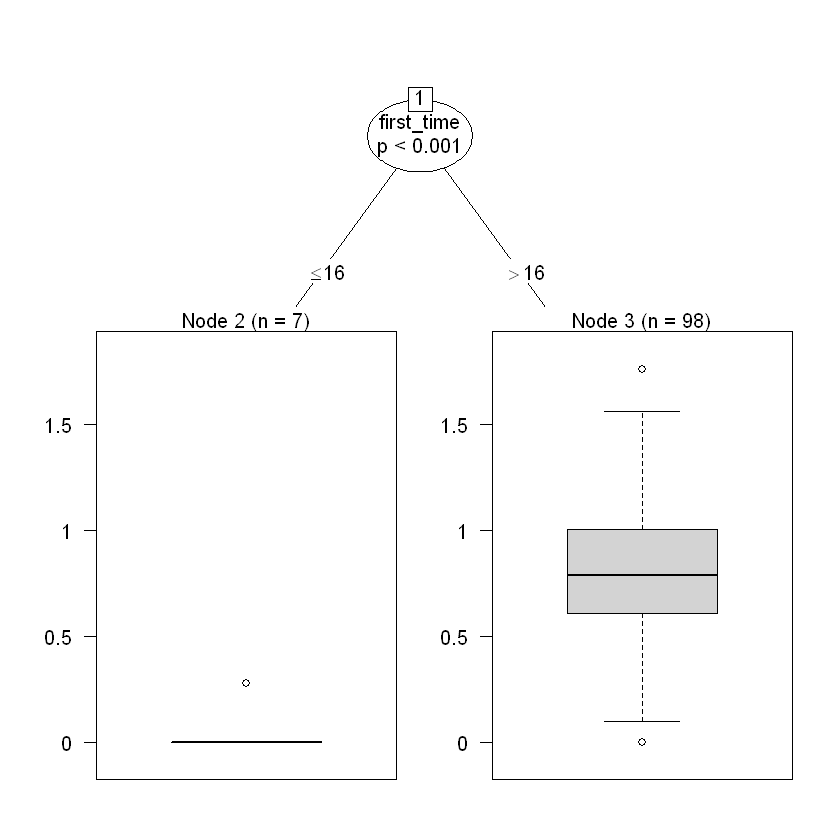

In [310]:
plot(lgd_da_3)

### Conditional Evaluation of Loss Severity given Probability of Cure

In [311]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [312]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [313]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [314]:
# time elapsed between bankruptcy and resolution
data_modelling$res_diff <- data_modelling$res_time - data_modelling$time

In [315]:
data_modelling$res_diff <- cut(data_modelling$res_diff, breaks=c(-1,12,38))

In [316]:
# selecting predictors and dependent variable(res_sold)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,27:31)

In [317]:
# deleting resolution timestamp, resolution amount and region
data_modelling <- data_modelling[,-c(5,14,16)]

In [318]:
str(data_modelling)

'data.frame':	1525 obs. of  16 variables:
 $ time               : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time          : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time         : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time           : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time       : num  130140 127859 84387 227000 223885 ...
 $ LTV_time           : num  99.1 101.4 102.6 67.5 87.2 ...
 $ REtype_CO_orig_time: int  0 0 0 0 0 1 0 0 0 0 ...
 $ REtype_PU_orig_time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time: int  1 1 1 1 1 0 1 1 1 1 ...
 $ balance_orig_time  : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time     : int  501 536 556 622 630 613 605 596 633 587 ...
 $ LTV_orig_time      : num  80 69.6 80 64.9 80 80 80 71.1 90 80 ...
 $ lgd_time           : num  0.00784 0 0 0 0.88392 ...
 $ mat_diff           : int  120 116 120 121 120 120 121 121 121 200 ...
 $ res_sold           : num  0 0 0 0 1 1 1 0 1 0 ...
 $ res_diff         

In [319]:
# deleting row with NA observation
data_modelling <- data_modelling[!is.na(data_modelling['LTV_time']),]

In [320]:
# changing variables types
data_modelling[colnames(data_modelling[,c(7:9)])] <- lapply(data_modelling[colnames(data_modelling[,c(7:9)])], factor)

In [321]:
data_modelling$res_sold <- as.factor(data_modelling$res_sold)

In [1156]:
# data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [1146]:
# dropping missing observations(1)
# data_modelling <- data_modelling %>% drop_na()

In [322]:
set.seed(101) 

In [323]:
train_index <- caret::createDataPartition(data_modelling$res_sold, p = .7, list = FALSE)

In [324]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [325]:
# creating conditional tree to divide observations based on feature res_sold (whether they were cured or not)
lgd_da_1 <- ctree(res_sold~.-res_diff-lgd_time,data=train)

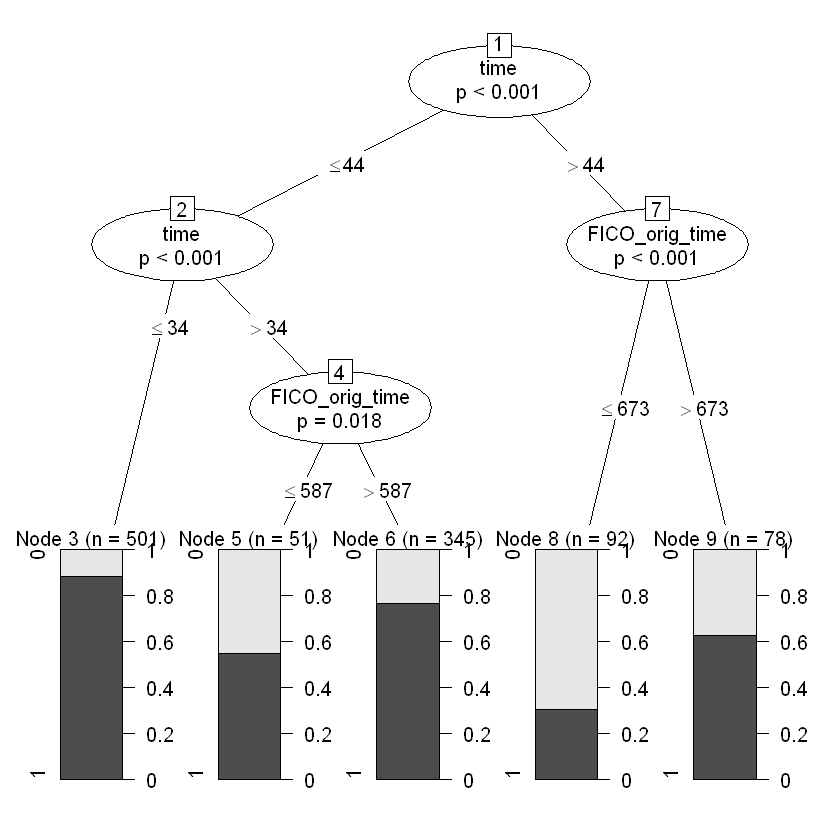

In [326]:
plot(lgd_da_1)

In [327]:
# 3rd and 6th node seems to separate accurately both type of observations
lgd_da_2 <- ctree(lgd_time ~res_diff, data=train, subset = predict(lgd_da_1, type = 'node') == 3)

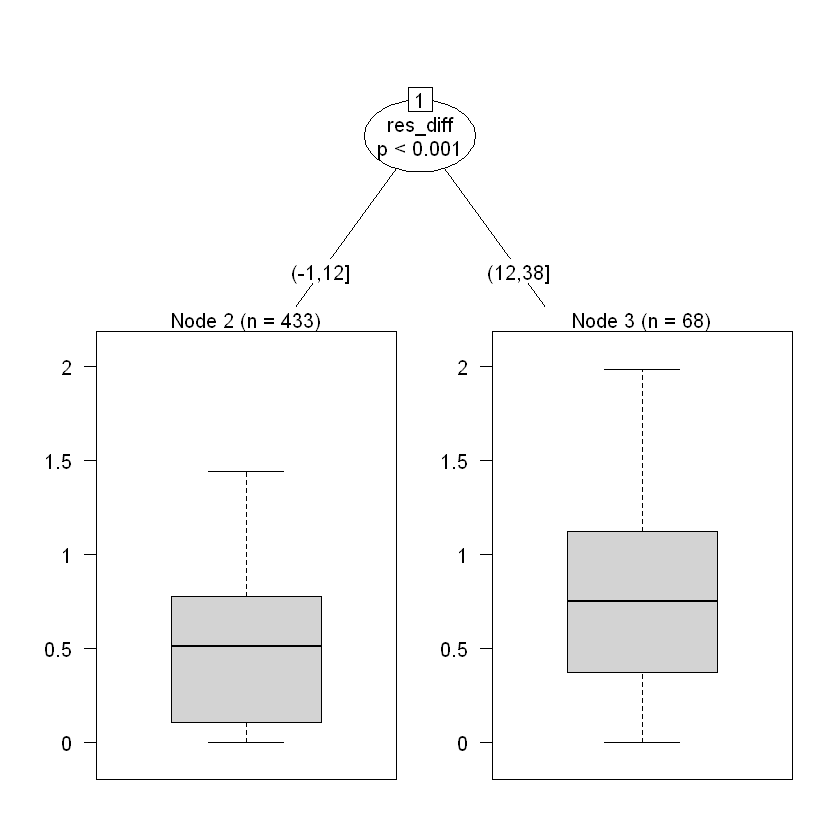

In [328]:
plot(lgd_da_2)

In [329]:
lgd_da_3 <- ctree(lgd_time ~res_diff, data=train, subset = predict(lgd_da_1, type = 'node') == 6)

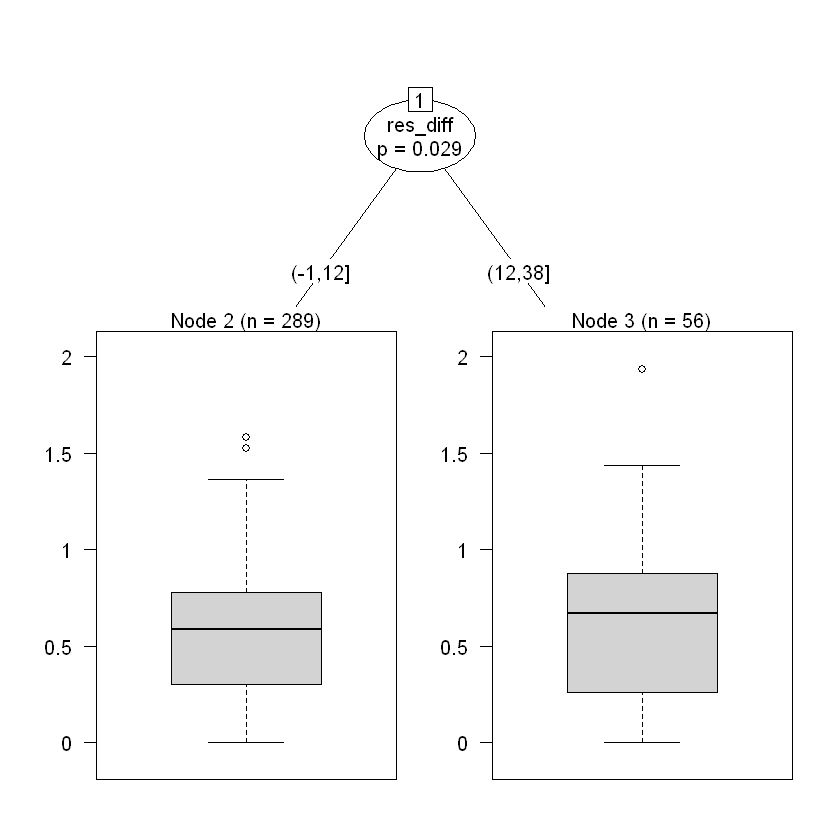

In [330]:
plot(lgd_da_3)

In [388]:
# multilevel analysis based on conditional trees can help to divide observations
# first variables are assigned based on res_sold (if the resolution followed default)
# then two states (resolution and no-resolution) can be analyzed separately

### LGD with Macroeconomic Variables

In [331]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [332]:
# selecting predictors and dependent variable(res_sold)
data_modelling <- dplyr::select(data_modelling, 2:23,27:29)

In [333]:
# deleting resolution timestamp and resolution amount
data_modelling <- data_modelling[,-c(5,9,16,28)]

In [334]:
str(data_modelling)

'data.frame':	1525 obs. of  22 variables:
 $ time                   : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time              : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time             : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time               : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time           : num  130140 127859 84387 227000 223885 ...
 $ LTV_time               : num  99.1 101.4 102.6 67.5 87.2 ...
 $ interest_rate_time     : num  8 7 7.81 7.33 7.36 ...
 $ hpi_time               : num  153 153 156 201 201 ...
 $ gdp_time               : num  -4.15 -4.15 1.59 1.85 1.85 ...
 $ uer_time               : num  9 9 9.8 4.7 4.7 5 4.7 5 9.4 9.9 ...
 $ REtype_CO_orig_time    : int  0 0 0 0 0 1 0 0 0 0 ...
 $ REtype_PU_orig_time    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time    : int  1 1 1 1 1 0 1 1 1 1 ...
 $ balance_orig_time      : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time         : int  501 536 556 622 630 613 

In [335]:
# changing variables types
data_modelling[colnames(data_modelling[,c(11:13)])] <- lapply(data_modelling[colnames(data_modelling[,c(11:13)])], factor)

In [336]:
data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [337]:
set.seed(101) 

In [338]:
train_index <- caret::createDataPartition(data_modelling$lgd_time, p = .7, list = FALSE)

In [339]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [341]:
lgd.lm.full <- lm(lgd_time~interest_rate_time+hpi_time+gdp_time+uer_time+Interest_Rate_orig_time+hpi_orig_time, data = train)

In [342]:
summary(lgd.lm.full)


Call:
lm(formula = lgd_time ~ interest_rate_time + hpi_time + gdp_time + 
    uer_time + Interest_Rate_orig_time + hpi_orig_time, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72028 -0.29984  0.01051  0.25702  1.72221 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.4445714  0.2181519  -2.038   0.0418 *  
interest_rate_time       0.0333059  0.0065365   5.095 4.12e-07 ***
hpi_time                 0.0009143  0.0008060   1.134   0.2569    
gdp_time                -0.0136843  0.0057286  -2.389   0.0171 *  
uer_time                 0.0071871  0.0099126   0.725   0.4686    
Interest_Rate_orig_time  0.0041546  0.0034385   1.208   0.2272    
hpi_orig_time            0.0022013  0.0004212   5.226 2.08e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3703 on 1062 degrees of freedom
Multiple R-squared:  0.06535,	Adjusted R-squared:  0.06007 
F-statistic: 

In [343]:
lgd.stepwise<- stepAIC(lgd.lm.full, direction = 'both')

Start:  AIC=-2117.15
lgd_time ~ interest_rate_time + hpi_time + gdp_time + uer_time + 
    Interest_Rate_orig_time + hpi_orig_time

                          Df Sum of Sq    RSS     AIC
- uer_time                 1    0.0721 145.68 -2118.6
- hpi_time                 1    0.1764 145.78 -2117.8
- Interest_Rate_orig_time  1    0.2002 145.80 -2117.7
<none>                                 145.60 -2117.2
- gdp_time                 1    0.7823 146.39 -2113.4
- interest_rate_time       1    3.5596 149.16 -2093.3
- hpi_orig_time            1    3.7449 149.35 -2092.0

Step:  AIC=-2118.62
lgd_time ~ interest_rate_time + hpi_time + gdp_time + Interest_Rate_orig_time + 
    hpi_orig_time

                          Df Sum of Sq    RSS     AIC
- hpi_time                 1    0.1095 145.78 -2119.8
- Interest_Rate_orig_time  1    0.2133 145.89 -2119.1
<none>                                 145.68 -2118.6
+ uer_time                 1    0.0721 145.60 -2117.2
- gdp_time                 1    0.7368 146.41

In [344]:
summary(lgd.stepwise)


Call:
lm(formula = lgd_time ~ interest_rate_time + gdp_time + hpi_orig_time, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73876 -0.29407  0.01211  0.25781  1.70339 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.2530396  0.1064035  -2.378   0.0176 *  
interest_rate_time  0.0357288  0.0057482   6.216 7.33e-10 ***
gdp_time           -0.0109021  0.0049830  -2.188   0.0289 *  
hpi_orig_time       0.0023106  0.0004149   5.568 3.25e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3702 on 1065 degrees of freedom
Multiple R-squared:  0.063,	Adjusted R-squared:  0.06036 
F-statistic: 23.87 on 3 and 1065 DF,  p-value: 5.916e-15


In [345]:
# using linear model with stepwise selection, three macro variables were selected as significantly important in lgd prediction: interest rate, gdp and hpi 

#### Macroeconomic variables with time lead

In [354]:
mv_lead <- train[order(train['time']),]

In [355]:
mv_lead<-subset(mv_lead, select=c(1,7:10,17,19))

In [356]:
str(mv_lead)

'data.frame':	1069 obs. of  7 variables:
 $ time                   : int  3 4 5 6 6 7 7 7 9 10 ...
 $ interest_rate_time     : num  10.9 13.5 12.6 11.7 10.8 ...
 $ hpi_time               : num  114 117 120 123 123 ...
 $ gdp_time               : num  2.848 2.273 0.931 0.494 0.494 ...
 $ uer_time               : num  3.9 4.2 4.4 4.6 4.6 5.3 5.3 5.3 5.9 5.8 ...
 $ Interest_Rate_orig_time: num  10.9 13.5 12.6 11.7 0 ...
 $ hpi_orig_time          : num  113.6 110.9 110.9 113.6 91.3 ...


In [357]:
# unique observations based on time
mv_lead <- mv_lead[!duplicated(mv_lead[,c(1)]),]

In [350]:
time <- mv_lead$time[1:54]

In [352]:
time

[1]  3  4  5  6  7  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26 27 28 29
[26] 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
[51] 55 56 57 58

In [358]:
# moving average from 12 periods after bankruptcy
# for cases for which data is unavailable for that number of periods, at least 3 periods
# E.g if data is accessible for 13 next periods, then MA from 12 periods, if for 9 periods, then from 9 periods, if for 8 periods, then from 8 periods etc.
mv_lead <- rollapply(mv_lead[2:7], width=12, FUN=mean, align = "left", partial=3)

In [359]:
mv_lead <- cbind(time, mv_lead)

In [361]:
head(mv_lead)

time,interest_rate_time,hpi_time,gdp_time,uer_time,Interest_Rate_orig_time,hpi_orig_time
3,10.865833,135.7158,1.959552,5.291667,7.789583,117.9642
4,10.790833,141.2067,2.066118,5.433333,6.877083,115.4900
5,10.353333,147.0583,2.157537,5.541667,6.439583,118.0967
6,10.061667,153.0075,2.335733,5.633333,5.385417,124.4308
7,9.620000,159.3675,2.590952,5.691667,4.410417,128.9600
9,9.553333,166.4692,2.852792,5.683333,4.343750,136.9267


##### Loss severity given default

In [375]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [376]:
data_modelling_mv <- merge(data_modelling, mv_lead,by='time')

In [377]:
str(data_modelling_mv)

'data.frame':	1513 obs. of  35 variables:
 $ time                     : int  3 3 4 4 5 5 5 6 6 6 ...
 $ id                       : int  8184 8250 8039 8008 9298 7967 8155 18068 8417 9340 ...
 $ orig_time                : int  3 3 2 2 2 2 3 -4 3 2 ...
 $ first_time               : int  3 3 2 2 2 2 3 1 3 2 ...
 $ mat_time                 : int  120 119 119 119 120 119 119 117 121 58 ...
 $ res_time                 : int  11 11 9 22 16 20 22 7 22 22 ...
 $ balance_time             : num  119390 41172 81724 68155 81017 ...
 $ LTV_time                 : num  89.8 74.9 66.4 75.7 59.9 ...
 $ interest_rate_time.x     : num  10.9 13 13.5 9.9 12.6 ...
 $ rate_time                : num  5.12 5.12 5.8 5.8 5.8 5.8 5.12 5.25 5.12 5.8 ...
 $ hpi_time.x               : num  114 114 117 117 120 ...
 $ gdp_time.x               : num  2.848 2.848 2.273 2.273 0.931 ...
 $ uer_time.x               : num  3.9 3.9 4.2 4.2 4.4 4.4 4.4 4.6 4.6 4.6 ...
 $ REtype_CO_orig_time      : int  0 0 0 0 0 0 0 0 0 0 ...


In [378]:
set.seed(101) 

In [379]:
train_index <- caret::createDataPartition(data_modelling_mv$time, p = .7, list = FALSE)

In [380]:
train <- data_modelling_mv[ train_index,]
test <- data_modelling_mv[-train_index,]

In [381]:
lgd.lm.lead.ma <- lm(lgd_time~interest_rate_time.y+hpi_time.y+gdp_time.y+ uer_time.y+Interest_Rate_orig_time.y+hpi_orig_time.y, data = train)

In [382]:
summary(lgd.lm.lead.ma)


Call:
lm(formula = lgd_time ~ interest_rate_time.y + hpi_time.y + gdp_time.y + 
    uer_time.y + Interest_Rate_orig_time.y + hpi_orig_time.y, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63398 -0.27837  0.01057  0.24948  1.67374 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)   
(Intercept)               -0.379454   0.582036  -0.652  0.51458   
interest_rate_time.y       0.083676   0.033723   2.481  0.01325 * 
hpi_time.y                -0.006600   0.003080  -2.143  0.03236 * 
gdp_time.y                 0.026679   0.038670   0.690  0.49040   
uer_time.y                -0.015166   0.040811  -0.372  0.71025   
Interest_Rate_orig_time.y -0.016028   0.026989  -0.594  0.55273   
hpi_orig_time.y            0.007473   0.002767   2.701  0.00703 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3638 on 1053 degrees of freedom
Multiple R-squared:  0.07522,	Adjusted R-squared:  0.069

In [ ]:
# In model with macro variables with 12 period time lead, 3 variables are statistically significant: interest rate, hpi at time of default and hpi at origin of loan

##### Default event prediction

In [362]:
# filtering loans that defaulted and that were paid off
data_modelling <- subset(data, (data[,"status_time"] >= 1))

In [363]:
data_modelling$status_time <- ifelse(data_modelling$status_time == 1,1,0)

In [364]:
data_modelling_mv <- merge(data_modelling, mv_lead,by='time')

In [365]:
set.seed(101) 

In [366]:
train_index <- caret::createDataPartition(data_modelling_mv$status_time, p = .7, list = FALSE)

In [367]:
train <- data_modelling_mv[ train_index,]
test <- data_modelling_mv[-train_index,]

In [371]:
lgd.lm.lead.ma <- lm(status_time~interest_rate_time.y+hpi_time.y+gdp_time.y+uer_time.y+Interest_Rate_orig_time.y+hpi_orig_time.y, data = train)

In [372]:
summary(lgd.lm.lead.ma)


Call:
lm(formula = status_time ~ interest_rate_time.y + hpi_time.y + 
    gdp_time.y + uer_time.y + Interest_Rate_orig_time.y + hpi_orig_time.y, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74540 -0.32212 -0.07634  0.34157  0.95217 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -0.029494   0.390173  -0.076   0.9397    
interest_rate_time.y      -0.045500   0.023351  -1.949   0.0515 .  
hpi_time.y                 0.001227   0.002044   0.600   0.5483    
gdp_time.y                -0.001097   0.025501  -0.043   0.9657    
uer_time.y                 0.171216   0.026002   6.585 5.41e-11 ***
Interest_Rate_orig_time.y -0.014174   0.017767  -0.798   0.4251    
hpi_orig_time.y           -0.002688   0.001794  -1.498   0.1342    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4224 on 2843 degrees of freedom
Multiple R-squared:  0.2418,	Adjusted R-squar

In [373]:
lgd.lm.lead.ma.stepwise<- stepAIC(lgd.lm.lead.ma, direction = 'both')

Start:  AIC=-4905.2
status_time ~ interest_rate_time.y + hpi_time.y + gdp_time.y + 
    uer_time.y + Interest_Rate_orig_time.y + hpi_orig_time.y

                            Df Sum of Sq    RSS     AIC
- gdp_time.y                 1    0.0003 507.27 -4907.2
- hpi_time.y                 1    0.0643 507.33 -4906.8
- Interest_Rate_orig_time.y  1    0.1136 507.38 -4906.6
<none>                                   507.27 -4905.2
- hpi_orig_time.y            1    0.4005 507.67 -4905.0
- interest_rate_time.y       1    0.6774 507.95 -4903.4
- uer_time.y                 1    7.7365 515.00 -4864.1

Step:  AIC=-4907.2
status_time ~ interest_rate_time.y + hpi_time.y + uer_time.y + 
    Interest_Rate_orig_time.y + hpi_orig_time.y

                            Df Sum of Sq    RSS     AIC
- Interest_Rate_orig_time.y  1    0.1133 507.38 -4908.6
- hpi_time.y                 1    0.1505 507.42 -4908.4
<none>                                   507.27 -4907.2
+ gdp_time.y                 1    0.0003 507.27 -

In [374]:
summary(lgd.lm.lead.ma)


Call:
lm(formula = status_time ~ interest_rate_time.y + hpi_time.y + 
    gdp_time.y + uer_time.y + Interest_Rate_orig_time.y + hpi_orig_time.y, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74540 -0.32212 -0.07634  0.34157  0.95217 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -0.029494   0.390173  -0.076   0.9397    
interest_rate_time.y      -0.045500   0.023351  -1.949   0.0515 .  
hpi_time.y                 0.001227   0.002044   0.600   0.5483    
gdp_time.y                -0.001097   0.025501  -0.043   0.9657    
uer_time.y                 0.171216   0.026002   6.585 5.41e-11 ***
Interest_Rate_orig_time.y -0.014174   0.017767  -0.798   0.4251    
hpi_orig_time.y           -0.002688   0.001794  -1.498   0.1342    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4224 on 2843 degrees of freedom
Multiple R-squared:  0.2418,	Adjusted R-squar

In [ ]:
# for default prediction uer_time.y (uneployment rate) lead variable is statistically significant

### Tobit Regression

In [383]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [384]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [385]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [386]:
# selecting predictors and dependent variable(res_sold)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,27:30)

In [387]:
# deleting resolution timestamp and resolution amount
data_modelling <- data_modelling[,-c(5,16)]

In [389]:
str(data_modelling)

'data.frame':	1525 obs. of  16 variables:
 $ time               : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time          : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time         : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time           : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time       : num  130140 127859 84387 227000 223885 ...
 $ LTV_time           : num  99.1 101.4 102.6 67.5 87.2 ...
 $ REtype_CO_orig_time: int  0 0 0 0 0 1 0 0 0 0 ...
 $ REtype_PU_orig_time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time: int  1 1 1 1 1 0 1 1 1 1 ...
 $ balance_orig_time  : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time     : int  501 536 556 622 630 613 605 596 633 587 ...
 $ LTV_orig_time      : num  80 69.6 80 64.9 80 80 80 71.1 90 80 ...
 $ state_orig_time    : chr  "GA" "FL" "OH" "NY" ...
 $ lgd_time           : num  0.00784 0 0 0 0.88392 ...
 $ mat_diff           : int  120 116 120 121 120 120 121 121 121 200 ...
 $ res_sold         

In [390]:
# deleting row with NA observation
data_modelling <- data_modelling[!is.na(data_modelling['LTV_time']),]

In [391]:
# changing variables types
data_modelling[colnames(data_modelling[,c(7:9)])] <- lapply(data_modelling[colnames(data_modelling[,c(7:9)])], factor)

In [392]:
data_modelling$res_sold <- as.factor(data_modelling$res_sold)

In [393]:
data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [1736]:
# dropping missing observations(1)
# data_modelling <- data_modelling %>% drop_na()

In [394]:
set.seed(101) 

In [422]:
train_index <- caret::createDataPartition(data_modelling$res_sold, p = .7, list = FALSE)

In [423]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [424]:
# Fitting tobit regression with only o
fit_tobit <- tobit(lgd_time ~ LTV_time+time, data = train)

In [425]:
summary(fit_tobit)


Call:
tobit(formula = lgd_time ~ LTV_time + time, data = train)

Observations:
         Total  Left-censored     Uncensored Right-censored 
          1067            215            852              0 

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.2800839  0.0769353   3.641 0.000272 ***
LTV_time     0.0048333  0.0007516   6.431 1.27e-10 ***
time        -0.0084434  0.0017905  -4.716 2.41e-06 ***
Log(scale)  -0.7859721  0.0255308 -30.785  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Scale: 0.4557 

Gaussian distribution
Number of Newton-Raphson Iterations: 3 
Log-likelihood: -761.2 on 4 Df
Wald-statistic: 46.69 on 2 Df, p-value: 7.2496e-11 


In [426]:
# Tobit function that has been used doesn't automatically rescale the outcomes
range(predict(fit_tobit), train$lgd_time)

[1] -0.0121067  2.0227672

In [427]:
# A rescaling adjustment is performed as follows:

In [428]:
mu <- predict(fit_tobit, newdata=test)

In [429]:
sigma <- fit_tobit$scale

In [430]:
p0 <- pnorm(mu/sigma)

In [431]:
lambda <- function(x) dnorm(x)/pnorm(x)

In [432]:
predicted_loss <- mu + sigma * lambda(mu/sigma)

In [433]:
predicted_loss <- p0 * predicted_loss

In [434]:
test$predicted_loss <- predicted_loss

In [435]:
test <- tibble::rowid_to_column(test, "id")

In [436]:
# actual mean lgd given the cure event
mean(test[test['res_sold']==0,][,'lgd_time'])

[1] 0.1943564

In [437]:
# predicted mean lgd given the cure event
mean(test[test['res_sold']==0,][,'predicted_loss'])

[1] 0.4700345

In [438]:
# actual mean lgd given no-cure
mean(test[test['res_sold']==1,][,'lgd_time'])

[1] 0.5836357

In [439]:
# predicted mean lgd given no-cure
mean(test[test['res_sold']==1,][,'predicted_loss'])

[1] 0.4965243

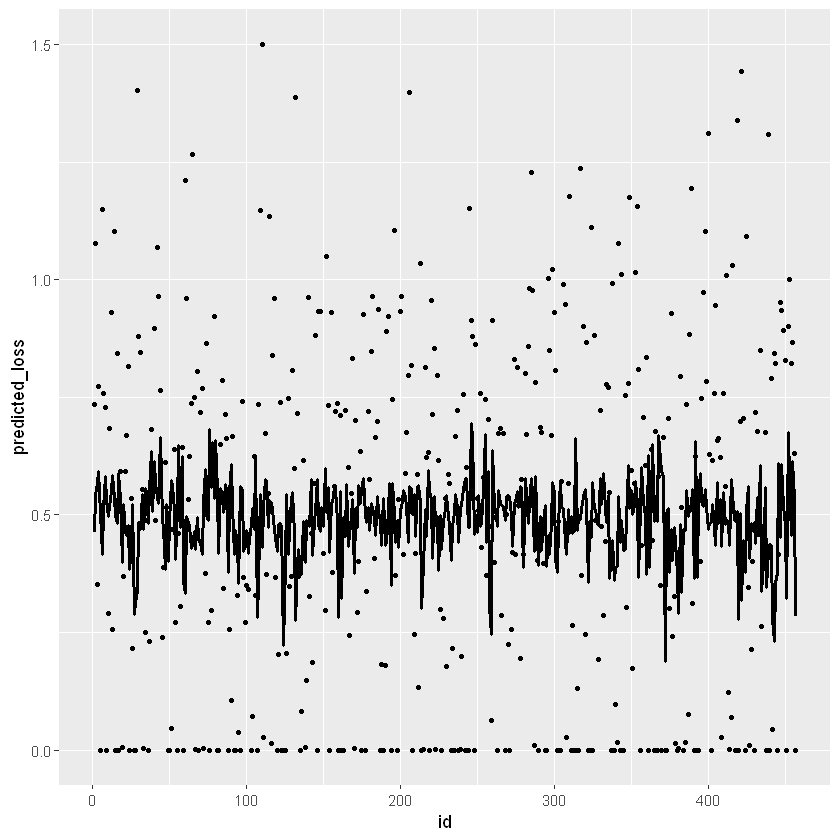

In [440]:
ggplot()+
    geom_line(data=test,aes(y=predicted_loss,x=id),size=1 ) +
    geom_point(data=test,aes(y=lgd_time,x=id),size=1)

In [ ]:
# The model does not seem to accurately capture lgd of cured accounts;
# However because of relatively small percentage of cured accounts the model quite well captures lgd of non-cured accounts

### Beta Regression

In [441]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [442]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [443]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [444]:
# Beta distribution is defined within the interval (0,1), because of that lgds values, which are not within this interval are changed
# new variable (lgd_new) with changed lgd is created 
data_modelling <- data_modelling %>%
dplyr::mutate(lgd_new= ifelse(lgd_time>=1,0.9999,
no=ifelse(lgd_time<=0,0.0001,lgd_time)))

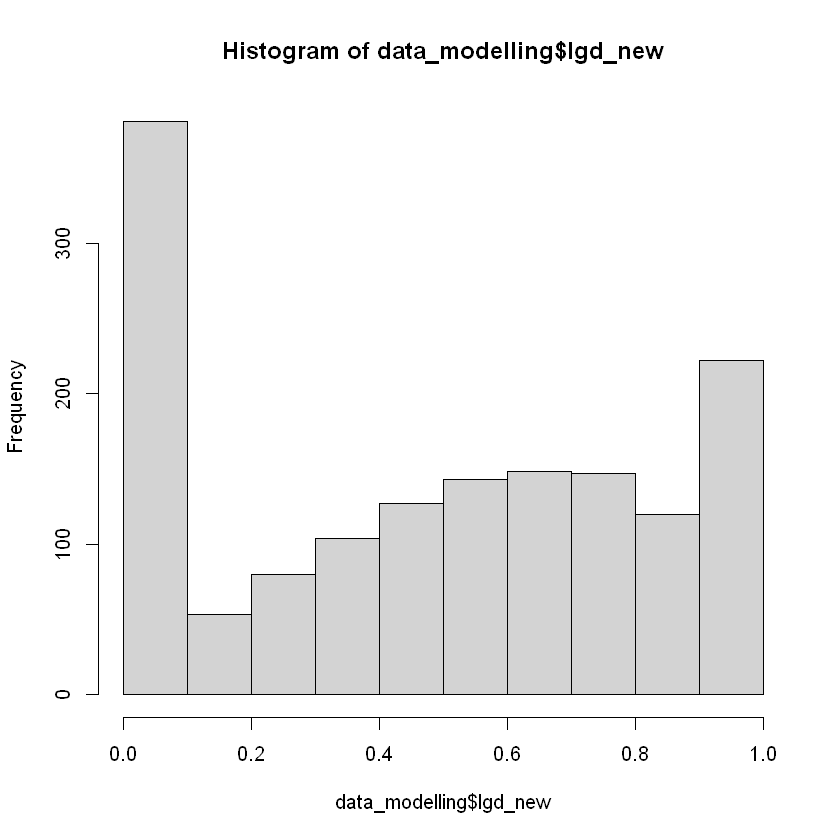

In [445]:
hist(data_modelling$lgd_new)

In [446]:
# selecting predictors and dependent variable(lgd_time)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,27:31)

In [447]:
# deleting resolution timestamp and resolution amount
data_modelling <- data_modelling[,-c(5,16)]

In [448]:
str(data_modelling)

'data.frame':	1525 obs. of  17 variables:
 $ time               : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time          : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time         : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time           : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time       : num  130140 127859 84387 227000 223885 ...
 $ LTV_time           : num  99.1 101.4 102.6 67.5 87.2 ...
 $ REtype_CO_orig_time: int  0 0 0 0 0 1 0 0 0 0 ...
 $ REtype_PU_orig_time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time: int  1 1 1 1 1 0 1 1 1 1 ...
 $ balance_orig_time  : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time     : int  501 536 556 622 630 613 605 596 633 587 ...
 $ LTV_orig_time      : num  80 69.6 80 64.9 80 80 80 71.1 90 80 ...
 $ state_orig_time    : chr  "GA" "FL" "OH" "NY" ...
 $ lgd_time           : num  0.00784 0 0 0 0.88392 ...
 $ mat_diff           : int  120 116 120 121 120 120 121 121 121 200 ...
 $ res_sold         

In [449]:
# deleting row with NA observation
data_modelling <- data_modelling[!is.na(data_modelling['LTV_time']),]

In [450]:
# changing variables types
data_modelling[colnames(data_modelling[,c(7:9)])] <- lapply(data_modelling[colnames(data_modelling[,c(7:9)])], factor)

In [451]:
data_modelling$res_sold <- as.factor(data_modelling$res_sold)

In [452]:
data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [473]:
set.seed(101) 

In [494]:
train_index <- caret::createDataPartition(data_modelling$res_sold, p = .7, list = FALSE)

In [495]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [496]:
fit_beta <- betareg(lgd_new ~ LTV_time+time+state_orig_time, data = train)

In [497]:
# different types of residuals can be used 
summary(fit_beta, type = 'sweighted')


Call:
betareg(formula = lgd_new ~ LTV_time + time + state_orig_time, data = train)

Standardized weighted residuals:
    Min      1Q  Median      3Q     Max 
-2.3530 -0.3520  0.1391  0.4657  2.3522 

Coefficients (mean model with logit link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        0.388049   0.592703   0.655 0.512653    
LTV_time           0.011008   0.002048   5.376 7.63e-08 ***
time              -0.017955   0.004988  -3.600 0.000319 ***
state_orig_timeAK -1.599898   1.322502  -1.210 0.226375    
state_orig_timeAL -1.214875   0.755331  -1.608 0.107747    
state_orig_timeAR -1.970552   0.899984  -2.190 0.028558 *  
state_orig_timeAZ -0.916651   0.617352  -1.485 0.137594    
state_orig_timeCA -1.054703   0.582282  -1.811 0.070090 .  
state_orig_timeCO -1.510050   0.668322  -2.259 0.023854 *  
state_orig_timeCT -1.114612   0.760702  -1.465 0.142855    
state_orig_timeDC -1.058017   0.943195  -1.122 0.261974    
state_orig_timeDE -1.759855   1.0357

In [498]:
train <- tibble::rowid_to_column(train, "id")

In [499]:
beta_predicted <- predict(fit_beta, newdata = train)

In [500]:
train$predicted_loss <- beta_predicted

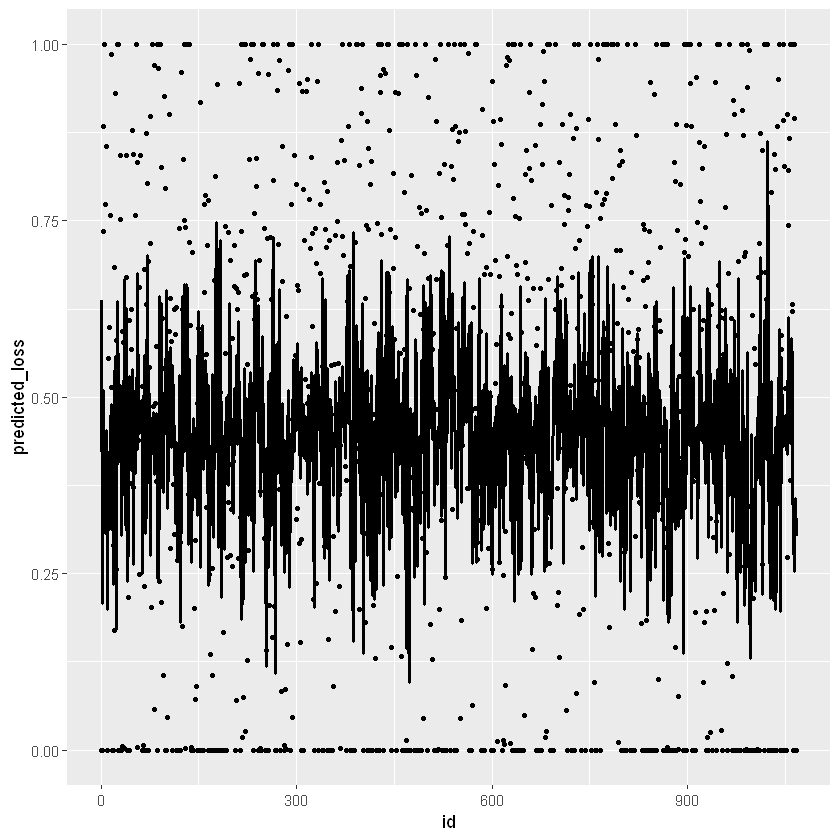

In [501]:
ggplot()+
    geom_line(data=train,aes(y=predicted_loss,x=id),size=1) +
    geom_point(data=train,aes(y=lgd_new,x=id),size=1)

In [502]:
# The variability of model's prediction is much greater comparing to tobit model
# The pseudo R-squared is still very low

### Mitxure-model Approach

In [503]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [504]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [505]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [506]:
# selecting predictors and dependent variable(lgd_time)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,27:30)

In [507]:
# deleting resolution timestamp and resolution amount
data_modelling <- data_modelling[,-c(5,16)]

In [508]:
str(data_modelling)

'data.frame':	1525 obs. of  16 variables:
 $ time               : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time          : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time         : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time           : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time       : num  130140 127859 84387 227000 223885 ...
 $ LTV_time           : num  99.1 101.4 102.6 67.5 87.2 ...
 $ REtype_CO_orig_time: int  0 0 0 0 0 1 0 0 0 0 ...
 $ REtype_PU_orig_time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time: int  1 1 1 1 1 0 1 1 1 1 ...
 $ balance_orig_time  : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time     : int  501 536 556 622 630 613 605 596 633 587 ...
 $ LTV_orig_time      : num  80 69.6 80 64.9 80 80 80 71.1 90 80 ...
 $ state_orig_time    : chr  "GA" "FL" "OH" "NY" ...
 $ lgd_time           : num  0.00784 0 0 0 0.88392 ...
 $ mat_diff           : int  120 116 120 121 120 120 121 121 121 200 ...
 $ res_sold         

In [509]:
# deleting row with NA observation
data_modelling <- data_modelling[!is.na(data_modelling['LTV_time']),]

In [510]:
# changing variables types
data_modelling[colnames(data_modelling[,c(7:9)])] <- lapply(data_modelling[colnames(data_modelling[,c(7:9)])], factor)

In [511]:
data_modelling$res_sold <- as.factor(data_modelling$res_sold)

In [512]:
data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [513]:
# dummy variable lgd_1
# lgd_1 = 1, if lgd was 100% or more
data_modelling$lgd_1<-dplyr::if_else(data_modelling$lgd_time >= 1,1,0)

In [514]:
# dummy variable lgd_0
# lgd_0 = 1, if lgd was 0% or less
data_modelling$lgd_0<-dplyr::if_else(data_modelling$lgd_time <= 0,1,0)

In [515]:
# dummy variable lgd_diff
# lgd_diff = 1, if lgd was in interval (0,1)
data_modelling$lgd_diff<-dplyr::if_else(data_modelling$lgd_time < 1 & data_modelling$lgd_time > 0,1,0)

In [516]:
# changing variables types
data_modelling[colnames(data_modelling[,c(17:19)])] <- lapply(data_modelling[colnames(data_modelling[,c(17:19)])], factor)

In [517]:
set.seed(101) 

In [518]:
train_index <- caret::createDataPartition(data_modelling$lgd_time, p = .7, list = FALSE)

In [519]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [520]:
lgd_da_1 <- ctree(lgd_time~lgd_1,data=train,maxdepth = 1)

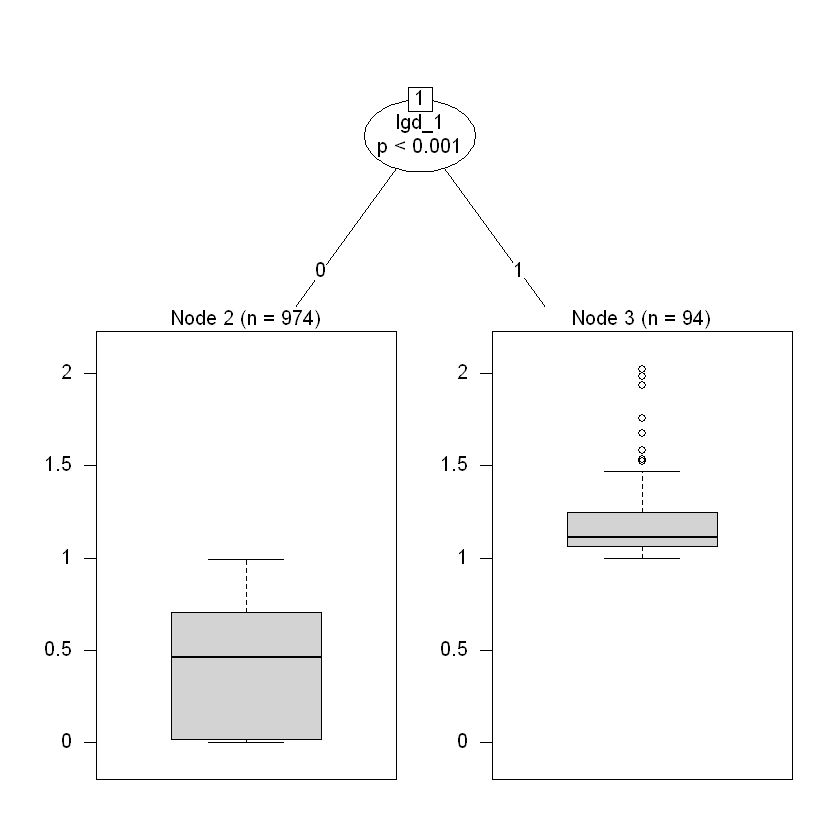

In [521]:
plot(lgd_da_1)

In [522]:
# modelling lgd => 1
lgd_da_2 <- ctree(lgd_time ~ .-res_sold-lgd_1-lgd_0-lgd_diff, data=train, subset = predict(lgd_da_1, type = 'node') == 3)

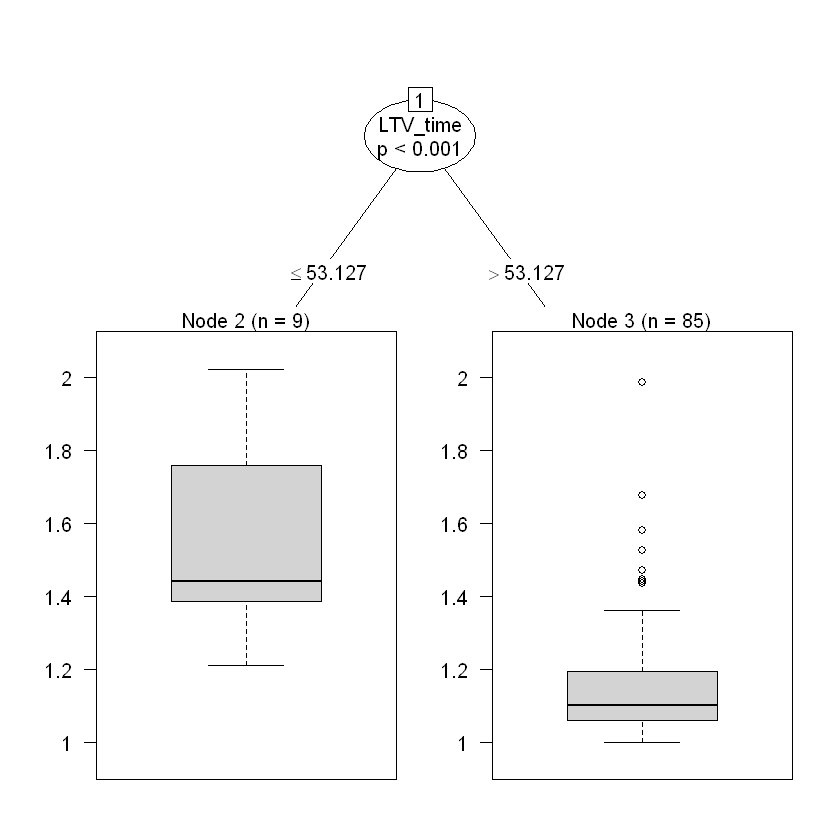

In [523]:
plot(lgd_da_2)

In [524]:
# modelling lgd <= 1

In [525]:
lgd_da_3 <- ctree(lgd_time ~ lgd_0, data=train, subset = predict(lgd_da_1, type = 'node') == 2)

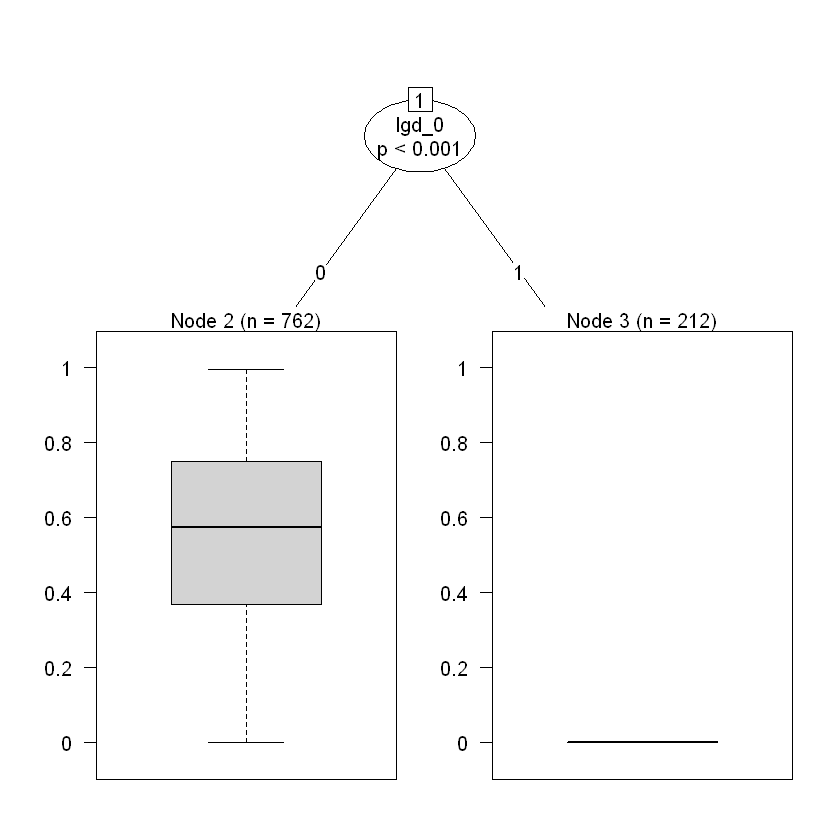

In [526]:
plot(lgd_da_3)

In [527]:
# In node 3 all lgd = 0 

In [528]:
lgd_da_4 <- ctree(lgd_time ~ lgd_diff, data = train)

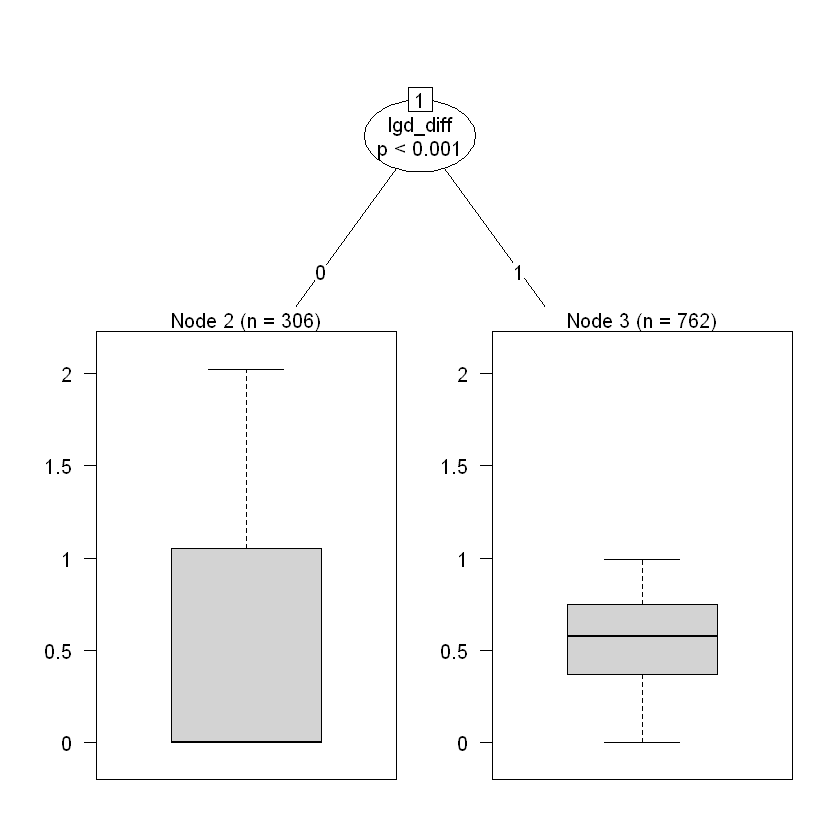

In [529]:
plot(lgd_da_4)

In [530]:
lgd_da_5 <- ctree(lgd_time ~ .-res_sold-lgd_1-lgd_0-lgd_diff-state_orig_time, data=train, subset = predict(lgd_da_4, type = 'node') == 3)

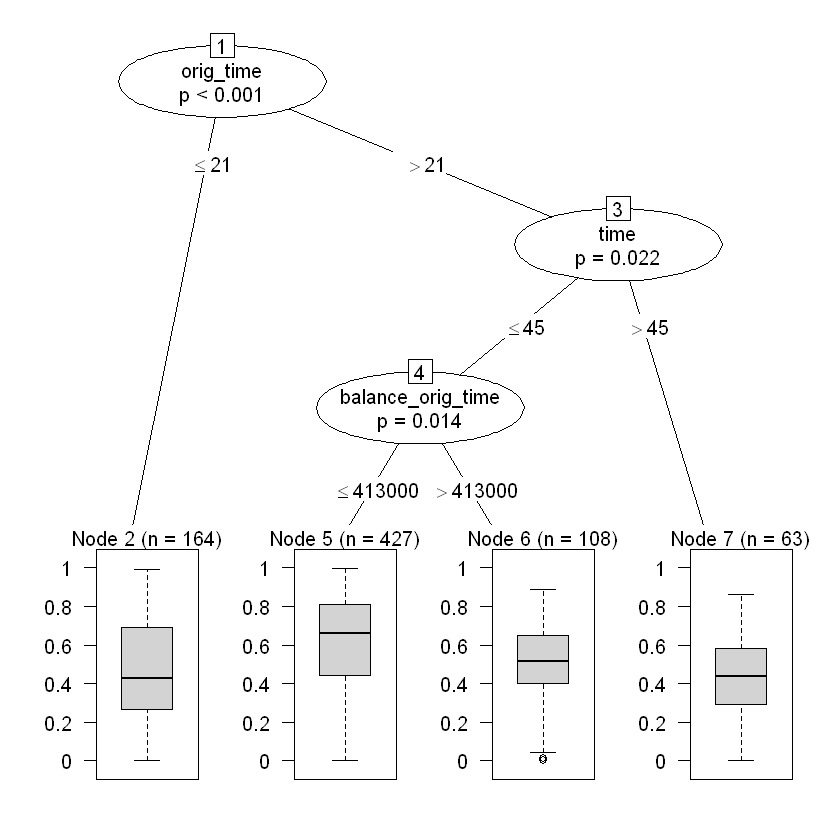

In [531]:
plot(lgd_da_5)

In [532]:
# fitting beta regression for observations in the lgd interval (0,1)

In [533]:
fit_beta <- betareg(lgd_time ~ LTV_time+time+state_orig_time, data=train, subset = predict(lgd_da_4, type = 'node') == 3)

In [534]:
# different types of residuals can be used 
summary(fit_beta, type = 'sweighted')


Call:
betareg(formula = lgd_time ~ LTV_time + time + state_orig_time, data = train, 
    subset = predict(lgd_da_4, type = "node") == 3)

Standardized weighted residuals:
    Min      1Q  Median      3Q     Max 
-5.5314 -0.4697  0.0786  0.5784  3.4244 

Coefficients (mean model with logit link):
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.152519   0.538489  -0.283  0.77700    
LTV_time           0.010184   0.002215   4.597 4.29e-06 ***
time              -0.015420   0.005875  -2.625  0.00868 ** 
state_orig_timeAK -2.176396   1.170689  -1.859  0.06302 .  
state_orig_timeAL  0.250856   0.644174   0.389  0.69696    
state_orig_timeAR -2.087682   1.174525  -1.777  0.07549 .  
state_orig_timeAZ  0.011571   0.539830   0.021  0.98290    
state_orig_timeCA -0.216788   0.518855  -0.418  0.67608    
state_orig_timeCO -0.663616   0.571016  -1.162  0.24517    
state_orig_timeCT -1.381530   0.735054  -1.879  0.06018 .  
state_orig_timeDC  1.252745   1.171735   1

In [540]:
train_lgd_diff <- train[train['lgd_diff']==1,]

In [541]:
train_lgd_diff <- tibble::rowid_to_column(train_lgd_diff, "id")

In [542]:
beta_predicted <- predict(fit_beta, newdata = train_lgd_diff)

In [543]:
train_lgd_diff$predicted_loss <- beta_predicted

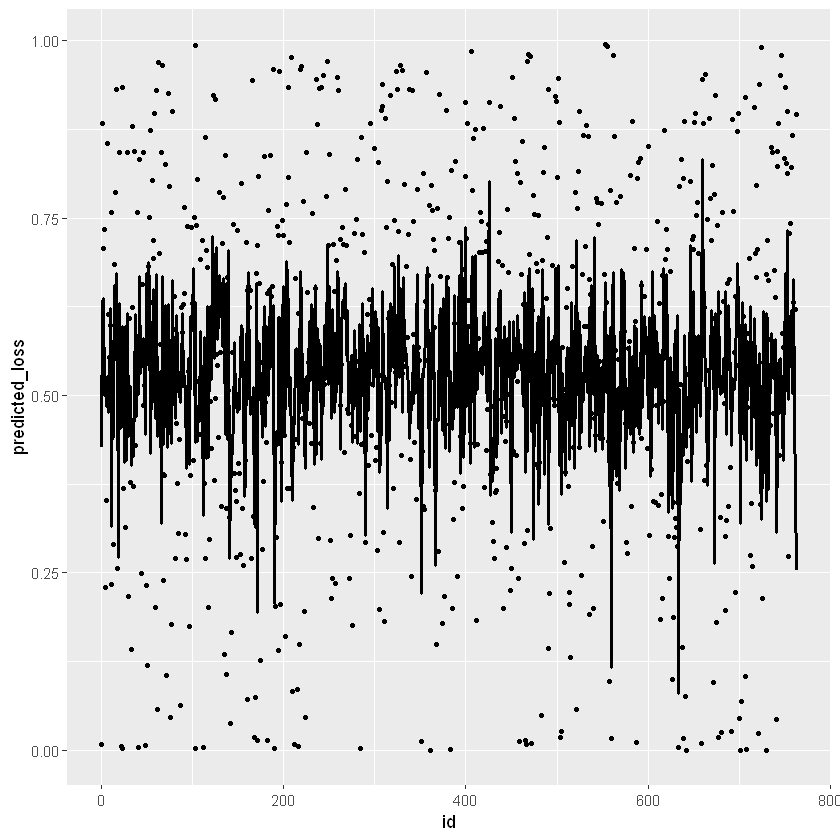

In [544]:
ggplot()+
    geom_line(data=train_lgd_diff,aes(y=predicted_loss,x=id),size=1) +
    geom_point(data=train_lgd_diff,aes(y=lgd_time,x=id),size=1)

In [ ]:
# As it can be noticed comparing the results received using beta regression and mixture model(beta regression on the interval(0,1)), 
# the pseudo R-squared is better in the first model, which seems counterintuitve
# The explanation can be that both models are not able to capture the results and in this case the pseudo R-squared is not appropriate metric to confirm models superiority

### ML models

#### Regression tree

In [2084]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [2085]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [2086]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [2087]:
# selecting predictors and dependent variable(lgd_time)
data_modelling <- dplyr::select(data_modelling, 2:8,14:16,18:20,22,27:30)

In [2089]:
# deleting resolution timestamp and resolution amount
data_modelling <- data_modelling[,-c(5,14,16)]

In [2090]:
str(data_modelling)

'data.frame':	1525 obs. of  15 variables:
 $ time               : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time          : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time         : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time           : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time       : num  130140 127859 84387 227000 223885 ...
 $ LTV_time           : num  99.1 101.4 102.6 67.5 87.2 ...
 $ REtype_CO_orig_time: int  0 0 0 0 0 1 0 0 0 0 ...
 $ REtype_PU_orig_time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time: int  1 1 1 1 1 0 1 1 1 1 ...
 $ balance_orig_time  : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time     : int  501 536 556 622 630 613 605 596 633 587 ...
 $ LTV_orig_time      : num  80 69.6 80 64.9 80 80 80 71.1 90 80 ...
 $ lgd_time           : num  0.00784 0 0 0 0.88392 ...
 $ mat_diff           : int  120 116 120 121 120 120 121 121 121 200 ...
 $ res_sold           : num  0 0 0 0 1 1 1 0 1 0 ...


In [2091]:
# deleting row with NA observation
data_modelling <- data_modelling[!is.na(data_modelling['LTV_time']),]

In [2092]:
# changing variables types
data_modelling[colnames(data_modelling[,c(7:9)])] <- lapply(data_modelling[colnames(data_modelling[,c(7:9)])], factor)

In [2093]:
data_modelling$res_sold <- as.factor(data_modelling$res_sold)

In [2094]:
# data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [2096]:
train_index <- caret::createDataPartition(data_modelling$res_sold, p = .7, list = FALSE)

In [2097]:
train <- data_modelling[ train_index,]
test <- data_modelling[-train_index,]

In [2098]:
# Fitting regression tree
lgd_reg_tree <- tree(lgd_time~.-res_sold, data=train)

In [2099]:
summary(lgd_reg_tree)


Regression tree:
tree(formula = lgd_time ~ . - res_sold, data = train)
Variables actually used in tree construction:
[1] "time"              "LTV_time"          "FICO_orig_time"   
[4] "balance_time"      "balance_orig_time"
Number of terminal nodes:  7 
Residual mean deviance:  0.1208 = 128 / 1060 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.836600 -0.306900 -0.002433  0.000000  0.255300  1.716000 

In [2106]:
tree_predict_test <- predict(lgd_reg_tree, test)

In [2107]:
rmse_lgd_reg_test <- sqrt(mean((tree_predict_test-test$lgd_time)^2))

In [2108]:
print(rmse_lgd_reg_test)

[1] 0.3667387


In [2109]:
# tree pruning
lgd_reg_tree_prune <- prune.tree(lgd_reg_tree, best=4)

In [2110]:
summary(lgd_reg_tree_prune)


Regression tree:
snip.tree(tree = lgd_reg_tree, nodes = c(11L, 4L))
Variables actually used in tree construction:
[1] "time"              "LTV_time"          "balance_orig_time"
Number of terminal nodes:  4 
Residual mean deviance:  0.1287 = 136.8 / 1063 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.836600 -0.306900  0.003013  0.000000  0.247200  1.716000 

In [2111]:
tree_predict_prune_test <- predict(lgd_reg_tree_prune, test)

In [2112]:
rmse_prune_test <- sqrt(mean((tree_predict_prune_test-test$lgd_time)^2))

In [2113]:
print(rmse_prune_test)

[1] 0.3661421


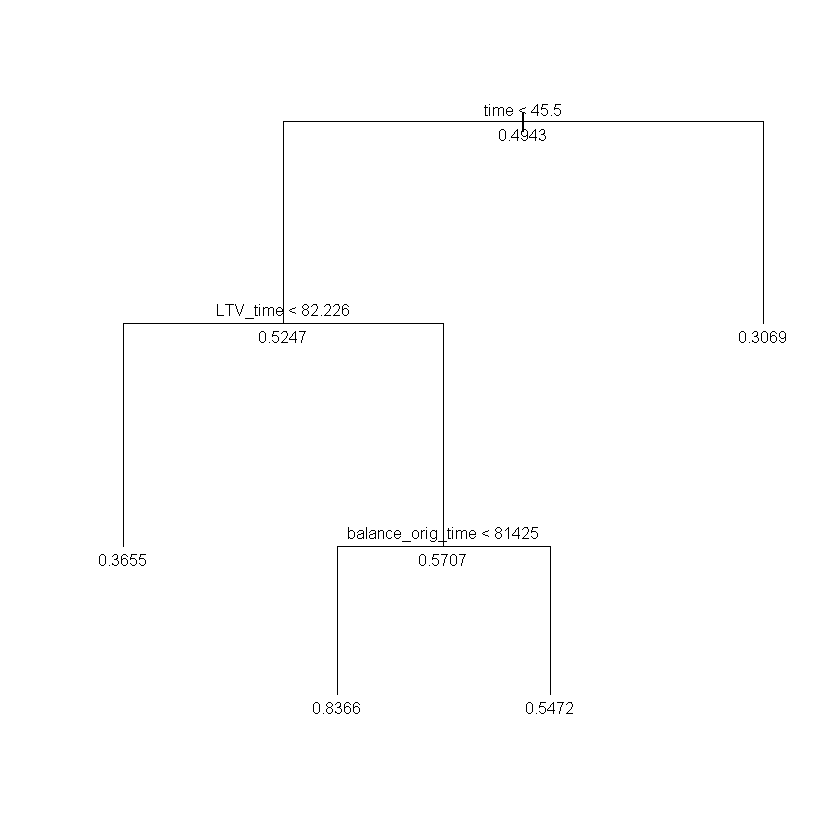

In [2114]:
# Pruned tree LGD modelling with four nodes and three key variables
plot(lgd_reg_tree_prune, 
    main="Classification Tree for Kyphosis")
    text(lgd_reg_tree_prune, all=TRUE, cex=.8)

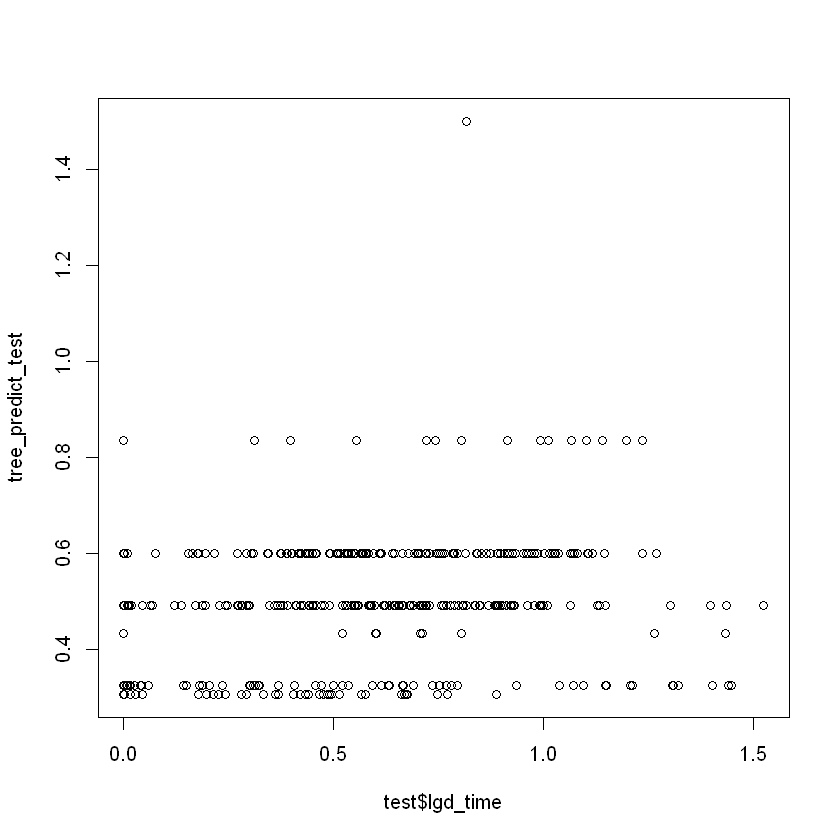

In [2115]:
# The tree structure is such that, for a given tree leaf, all accounts have the same LGD.
# This phenomenon is even more clear in the second graph, where the pruning process reduces the number of final nodes.
plot(test$lgd_time, tree_predict_test)

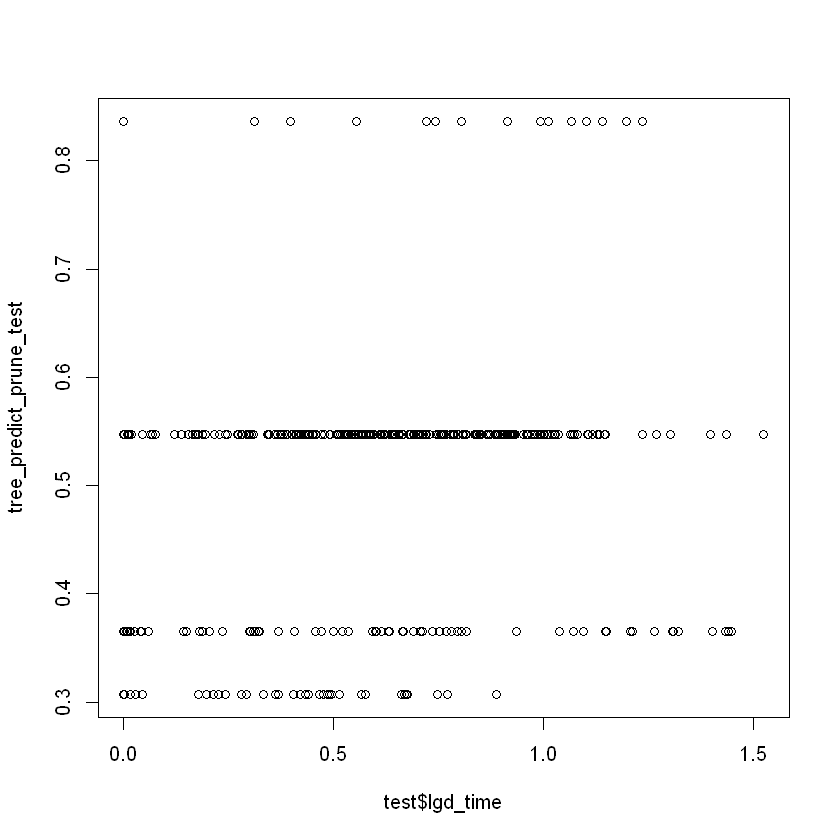

In [2116]:
plot(test$lgd_time, tree_predict_prune_test)

#### Random Forest

In [2117]:
rf_lgd <- randomForest(lgd_time~.-res_sold, data=train,mtry=4, ntree=100, importance=TRUE, na.action=na.omit)

In [2118]:
print(rf_lgd)


Call:
 randomForest(formula = lgd_time ~ . - res_sold, data = train,      mtry = 4, ntree = 100, importance = TRUE, na.action = na.omit) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 4

          Mean of squared residuals: 0.1338879
                    % Var explained: 7.26


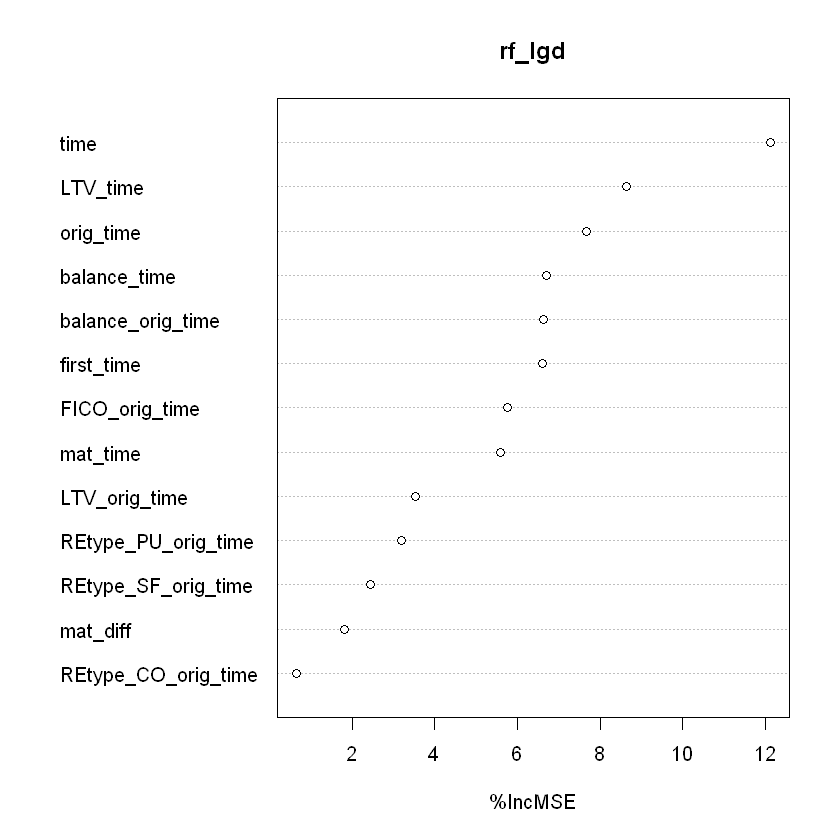

In [2119]:
# variable importance, type = 1 (IncMSE)
varImpPlot(rf_lgd,type=1)

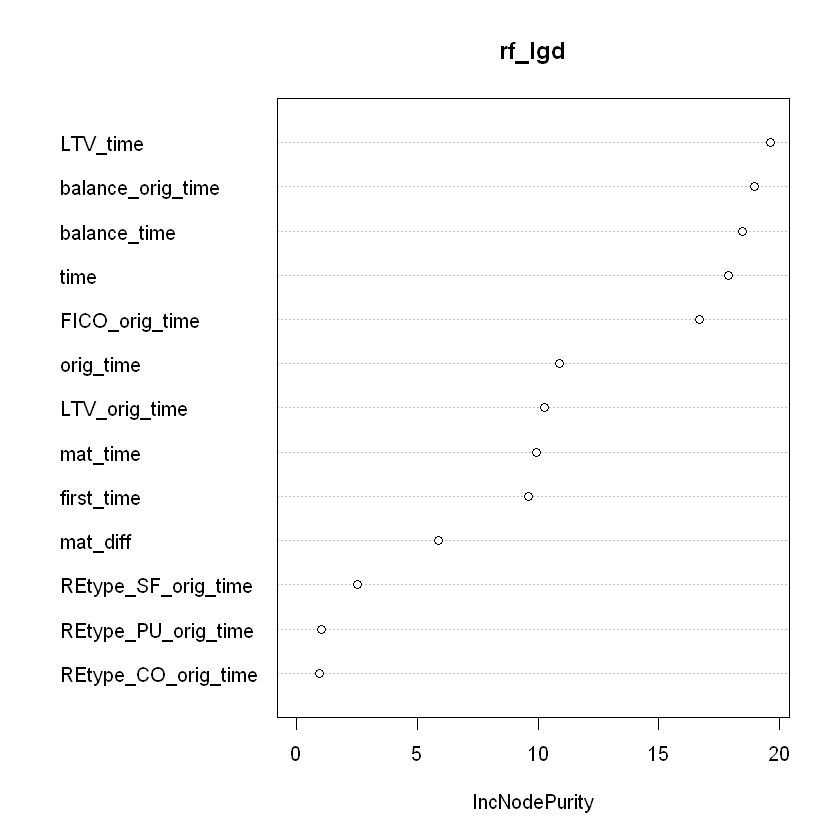

In [2120]:
# variable importance, type = 2 (IncNodePurity)
varImpPlot(rf_lgd,type=2)

In [2121]:
# predicting based on model
yhat_rf_lgd_test <- predict(rf_lgd,newdata=test)

In [ ]:
# As in case of Decision Trees, an optimal model would align fitted values on a 45-degree diagonal.

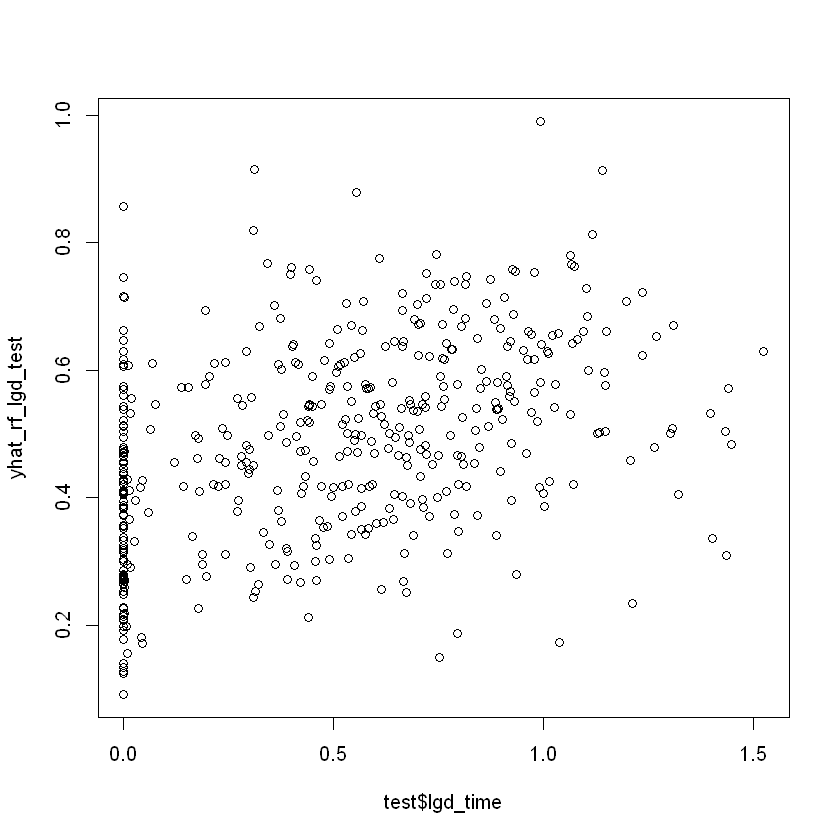

In [2122]:
plot(test$lgd_time, yhat_rf_lgd_test)

In [2123]:
rmse_lgd_reg_test <- sqrt(mean((yhat_rf_lgd_test-test$lgd_time)^2))

#### Random Forest with Macroeconomic Variables

In [2164]:
# filtering loans that defaulted
data_modelling <- subset(data, (data[,"status_time"] == 1))

In [2165]:
# A loan that deafaulted and was not cured (resolution)
data_modelling$res_sold <- 1

In [2166]:
# A loan that deafaulted and was cured (no resolution)
data_modelling$res_sold[is.na(data_modelling[,"res_time"])] <- 0

In [2168]:
# selecting predictors and dependent variable(res_sold)
data_modelling <- dplyr::select(data_modelling, 2:23,27:30)

In [2171]:
# deleting resolution timestamp and resolution amount
data_modelling <- data_modelling[,-c(5,9,16,24)]

In [2172]:
str(data_modelling)

'data.frame':	1525 obs. of  22 variables:
 $ time                   : int  37 37 40 31 31 33 31 32 42 41 ...
 $ orig_time              : int  18 25 21 21 23 27 26 27 27 28 ...
 $ first_time             : int  25 33 25 25 26 28 28 32 32 32 ...
 $ mat_time               : int  138 141 141 142 143 147 147 148 148 228 ...
 $ balance_time           : num  130140 127859 84387 227000 223885 ...
 $ LTV_time               : num  99.1 101.4 102.6 67.5 87.2 ...
 $ interest_rate_time     : num  8 7 7.81 7.33 7.36 ...
 $ hpi_time               : num  153 153 156 201 201 ...
 $ gdp_time               : num  -4.15 -4.15 1.59 1.85 1.85 ...
 $ uer_time               : num  9 9 9.8 4.7 4.7 5 4.7 5 9.4 9.9 ...
 $ REtype_CO_orig_time    : int  0 0 0 0 0 1 0 0 0 0 ...
 $ REtype_PU_orig_time    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ REtype_SF_orig_time    : int  1 1 1 1 1 0 1 1 1 1 ...
 $ balance_orig_time      : num  128000 129500 88000 227000 227200 ...
 $ FICO_orig_time         : int  501 536 556 622 630 613 

In [2173]:
# changing variables types
data_modelling[colnames(data_modelling[,c(11:13)])] <- lapply(data_modelling[colnames(data_modelling[,c(11:13)])], factor)

In [2174]:
data_modelling$state_orig_time <- as.factor(data_modelling$state_orig_time)

In [2175]:
data_modelling$res_sold <- as.factor(data_modelling$res_sold)

In [2176]:
# deleting row with NA observation
data_modelling <- data_modelling[!is.na(data_modelling['LTV_time']),]

In [470]:
# 1.2. Filter historical data set
lgd_fwd_macro_sel <- lgd_fwd_macro_sel_all[1:430,]

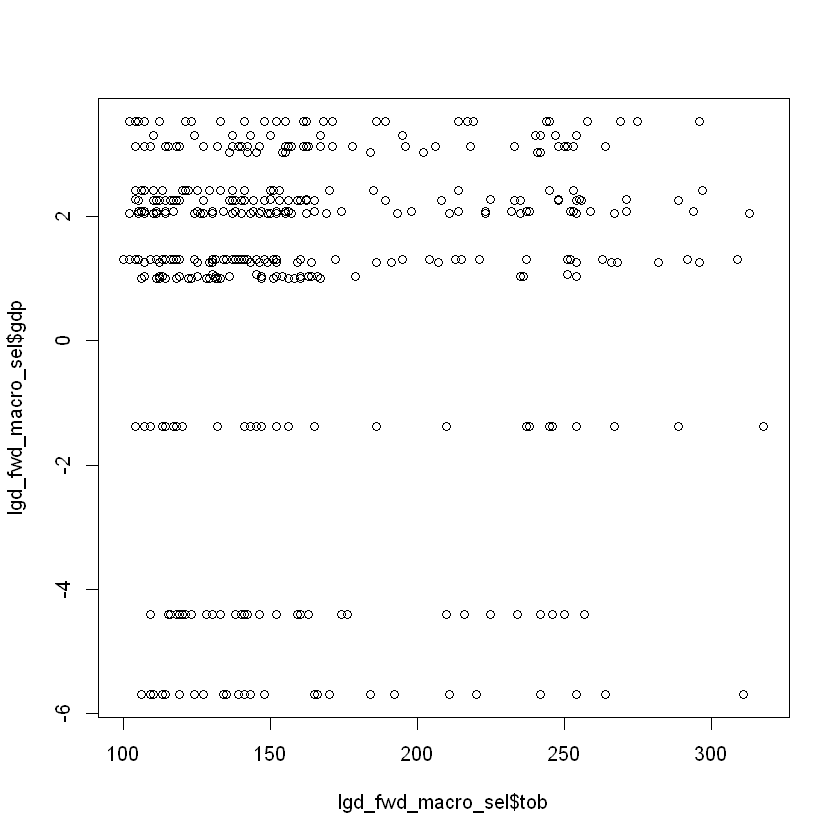

In [2194]:
plot(lgd_fwd_macro_sel$tob,lgd_fwd_macro_sel$gdp)

In [2177]:
set.seed(101)

In [2178]:
train_index_macro <- caret::createDataPartition(data_modelling$res_sold, p = .7, list = FALSE)

In [2180]:
train_macro <- data_modelling[ train_index_macro,]
test_macro <- data_modelling[-train_index_macro,]

In [2182]:
rf_lgd_macro <- randomForest(lgd_time~.-res_sold, data=train_macro, mtry=4, ntree=100, importance=TRUE, na.action=na.omit)

In [2186]:
importance(rf_lgd_macro, type = 1)

,%IncMSE
time,7.5307133
orig_time,3.7376516
first_time,3.8644040
mat_time,3.8913211
balance_time,4.7774241
LTV_time,5.9487279
interest_rate_time,4.8437196
hpi_time,4.2214767
gdp_time,3.2141573
uer_time,4.6072675


In [2184]:
# predicting based on model
yhat_rf_macro_lgd_test <- predict(rf_lgd_macro,newdata=test_macro)

In [ ]:
# As in case of Decision Trees, an optimal model would align fitted values on a 45-degree diagonal.

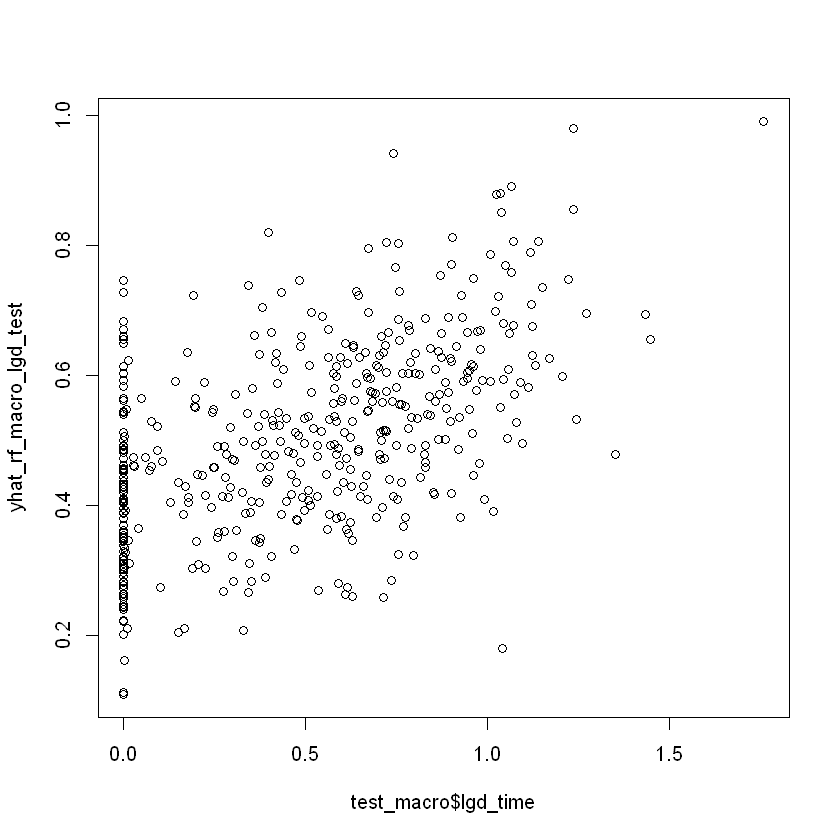

In [2185]:
plot(test_macro$lgd_time, yhat_rf_macro_lgd_test)

In [2187]:
rmse_lgd_reg_test <- sqrt(mean((yhat_rf_macro_lgd_test-test_macro$lgd_time)^2))

In [2188]:
rmse_lgd_reg_test

[1] 0.3203518

In [2191]:
# sensitivity analysis based on EDA

In [2205]:
data_modelling$time_div <- dplyr::if_else(data_modelling$time < 15 | data_modelling$time > 40,1,0)

In [2209]:
# frequency of values
table(data_modelling$time_div)


   0    1 
1122  402 

In [2208]:
# base scenario - observations for which MV's are stable
# based on the EDA for periods - 1:15, 40:60
lgd_data_macro_base <- data_modelling[data_modelling['time_div']==1,]

In [2210]:
lgd_data_macro_stress <- data_modelling[data_modelling['time_div']==0,]

In [2221]:
# random sampling 402 observations, so both datasets have the same size
lgd_data_macro_stress <- lgd_data_macro_stress[sample(nrow(lgd_data_macro_stress), replace = TRUE,prob = lgd_data_macro_stress$time, 402), ]

In [2222]:
yhat_rf_lgd_macro_base <- predict(rf_lgd_macro, newdata=lgd_data_macro_base)

In [2223]:
yhat_rf_lgd_macro_stress <- predict(rf_lgd_macro, newdata=lgd_data_macro_stress)

integer(0)

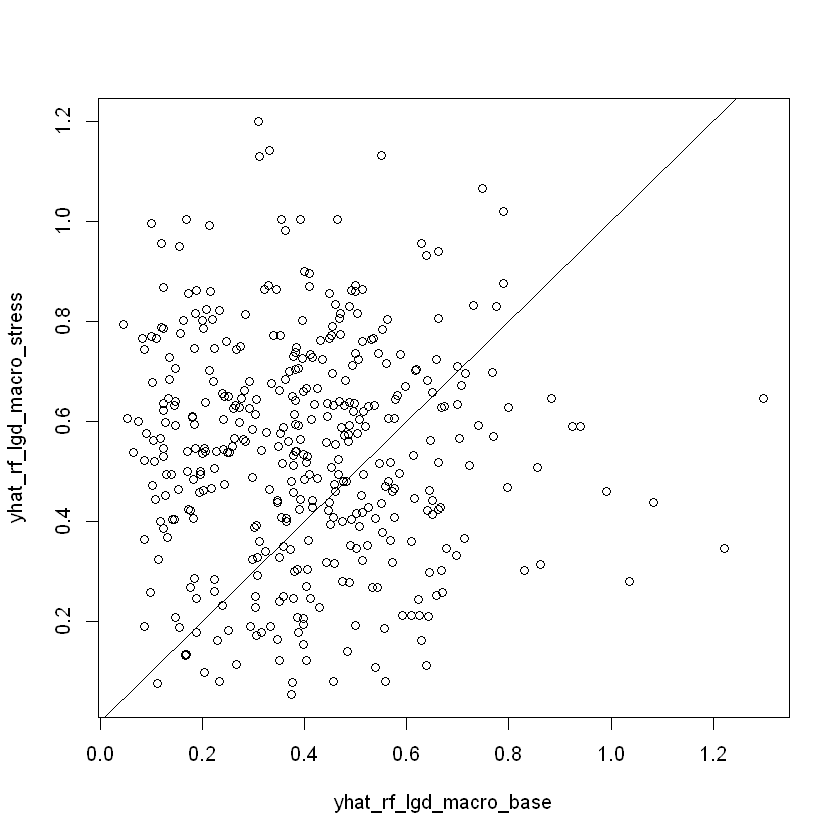

In [2224]:
plot(yhat_rf_lgd_macro_base, yhat_rf_lgd_macro_stress)+
    abline(coef = c(0,1))

In [2227]:
scenario_diff <- yhat_rf_lgd_macro_stress - yhat_rf_lgd_macro_base

In [2229]:
scenario_diff <- as.data.frame(scenario_diff)

In [2234]:
scenario_diff$count_diff <- dplyr::if_else(scenario_diff$scenario_diff <0,0,1)

In [2236]:
table(scenario_diff$count_diff)


  0   1 
132 270 

In [ ]:
# The majority of accounts is on the upper side of the diagonal, which is confirmed by the calculations(130 vs 270)
# This points out the role of macroeconomic variables in projecting LGDs.

### Generalized Boosted Regression

In [2125]:
set.seed(101)

In [2126]:
boost_lgd <- gbm(lgd_time~.-res_sold,
                data=train,
                distribution='gaussian',n.trees=100,interaction.depth=4)

,var,rel.inf
,<chr>,<dbl>
LTV_time,LTV_time,17.7767472
time,time,14.2517766
balance_time,balance_time,13.9667301
balance_orig_time,balance_orig_time,13.8800842
FICO_orig_time,FICO_orig_time,11.3749657
LTV_orig_time,LTV_orig_time,7.8681022
orig_time,orig_time,7.6030308
mat_time,mat_time,6.3595221
first_time,first_time,3.9828695


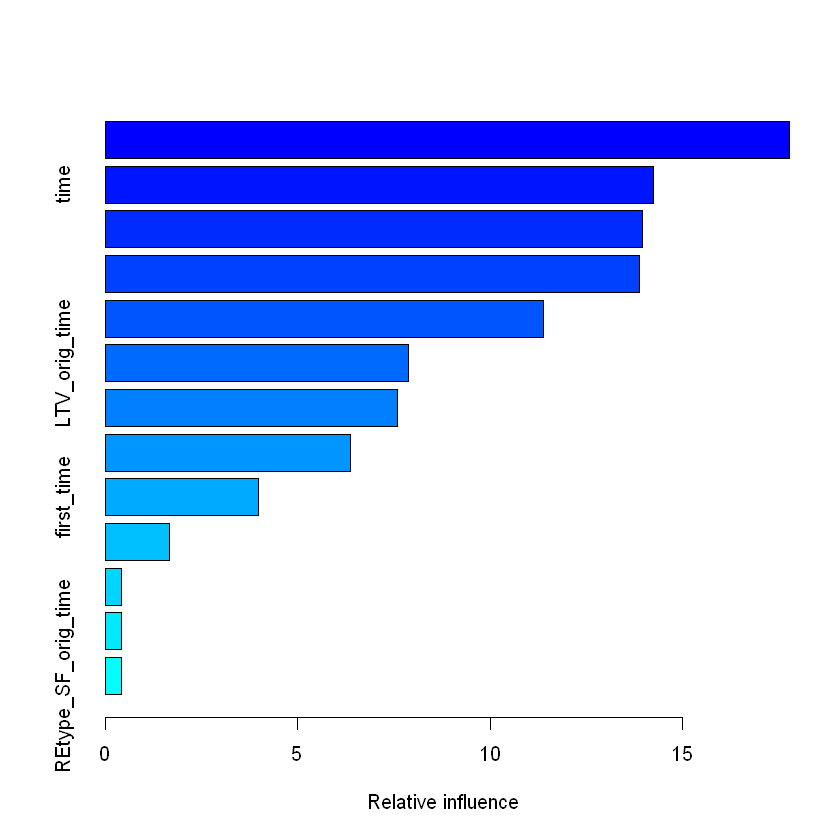

In [2127]:
summary(boost_lgd)

In [2130]:
# Prediction
yhat_boost_lgd_test=predict(boost_lgd,
                            newdata=test,n.trees=100)

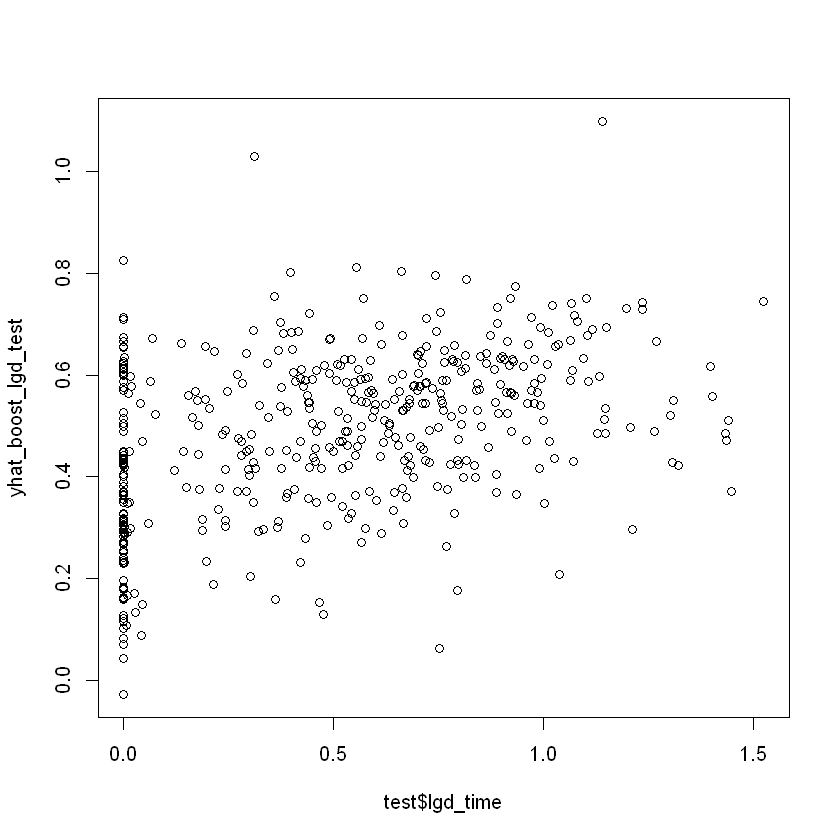

In [2131]:
plot(test$lgd_time, yhat_boost_lgd_test)

In [2132]:
rmse_lgd_reg_test <- sqrt(mean((yhat_boost_lgd_test-test$lgd_time)^2))

In [2133]:
rmse_lgd_reg_test

[1] 0.3478627

In [2134]:
# Applying a shrinkage
boost_lgd_shr=gbm(lgd_time~.-res_sold,
                data=train,
                distribution='gaussian',n.trees=100,interaction.depth=4,
                shrinkage=0.2,verbose=F)

In [2135]:
yhat_boost_lgd_test_shr=predict(boost_lgd_shr, newdata=test,n.trees=100)

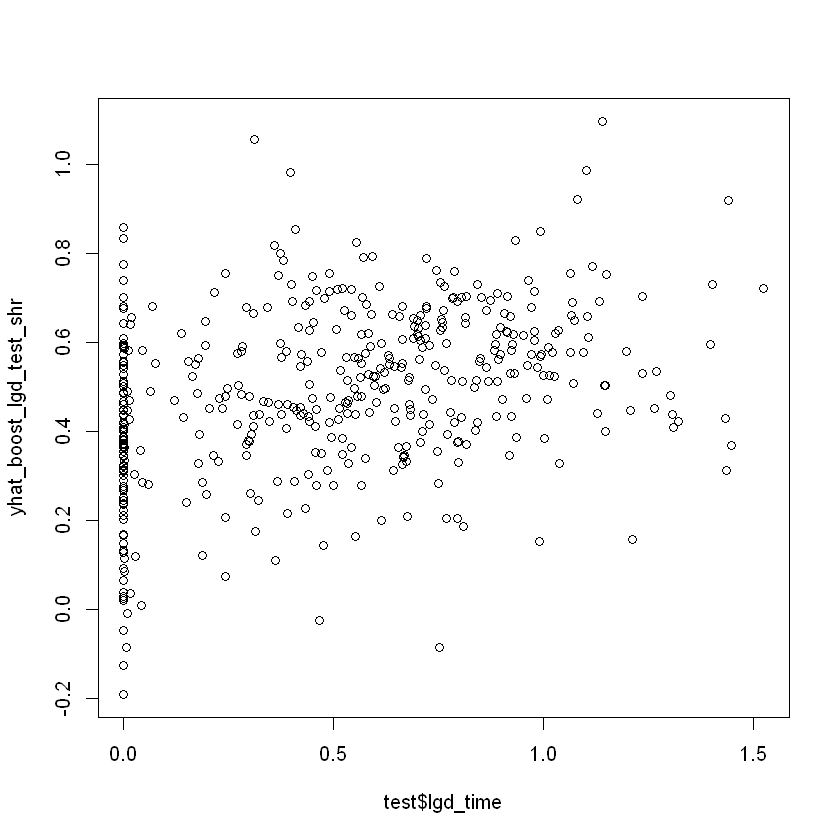

In [2136]:
# graph after shrinkage
plot(test$lgd_time, yhat_boost_lgd_test_shr)

In [2137]:
rmse_lgd_reg_test <- sqrt(mean((yhat_boost_lgd_test_shr-test$lgd_time)^2))

In [2237]:
rmse_lgd_reg_test

[1] 0.3203518